In [1]:
%run -i common.ipy

Exception: File `'common.ipy'` not found.

# Igualdad

In [ ]:
# Data tools
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Jupyter
from tqdm import tqdm
import ipywidgets as widgets

import ineqpy

from IPython.display import display, Latex, Markdown, HTML

pio.templates.default = 'seaborn'
sns.set_style()

# Local modules
%load_ext autoreload
%autoreload 1
%aimport utils
%aimport utils.tables
%aimport utils.functions

## Distribución del GEN gastado (excluyendo zeros)

In [ ]:
def _plot_gini(s, fname):
    s_np = s.to_numpy()
    utils.save_fig(ineqpy.inequality.lorenz(s_np).plot(title=s.name), f'inequality/{fname}_{s.name}.png')
    print("Gini:", ineqpy.inequality.gini(s_np))
    print("LAC:", utils.functions.lac(s_np))
    
def _plot_dist(s, fname):
    fig = sns.histplot(s, log_scale=True)
    utils.save_fig(fig, f'inequality/{fname}_{s.name}.png')
    plt.close(fig.get_figure())

saving to ../logseq/assets/nb_figures/inequality/staking_dist_mainnet.png
Figure is Axes
Use ![](../assets/nb_figures/inequality/staking_dist_mainnet.png) to embed it in logseq
saving to ../logseq/assets/nb_figures/inequality/staking_dist_xdai.png
Figure is Axes
Use ![](../assets/nb_figures/inequality/staking_dist_xdai.png) to embed it in logseq
saving to ../logseq/assets/nb_figures/inequality/staking_lorenz_mainnet.png
Figure is Axes
Use ![mainnet](../assets/nb_figures/inequality/staking_lorenz_mainnet.png) to embed it in logseq
Gini: 0.8629822544129488
LAC: 192.12471404059417
saving to ../logseq/assets/nb_figures/inequality/staking_lorenz_xdai.png
Figure is Axes
Use ![xdai](../assets/nb_figures/inequality/staking_lorenz_xdai.png) to embed it in logseq
Gini: 0.874090446206442
LAC: 56.08379564357962


network
mainnet    None
xdai       None
Name: absAmount, dtype: object

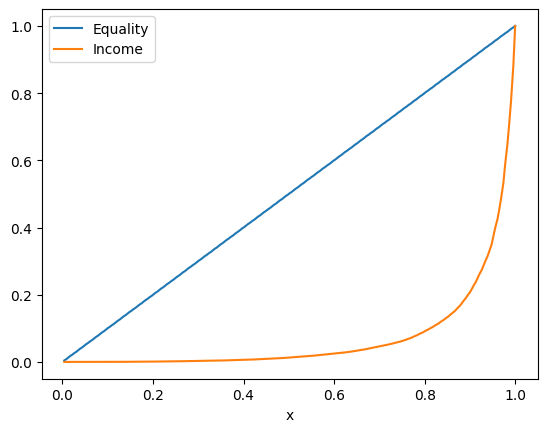

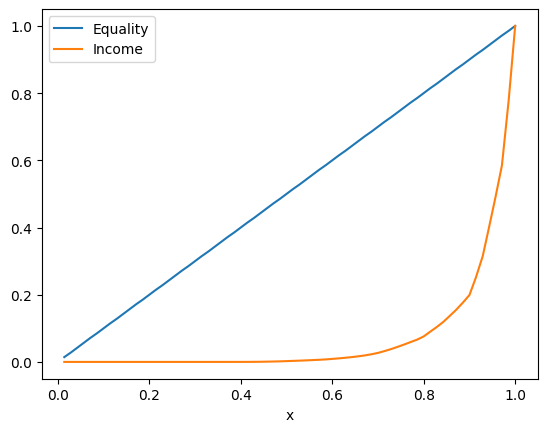

In [ ]:
dfs = utils.get_df('dfs')
dfs['absAmount'] = dfs['amount'].abs()
amount = dfs.groupby(['network', 'staker'])['absAmount'].sum()

amount.groupby('network').apply(_plot_dist, 'staking_dist')
amount.groupby('network').apply(_plot_gini, 'staking_lorenz')

## Distribución de participación (nact)

In [ ]:
dfh = utils.get_df('dfh')
dfhpos = dfh[dfh['nact'] > 0]

dfhpos.groupby('network')['nact'].apply(_plot_dist, 'dist_nact')
dfhpos.groupby('network')['nact'].apply(_plot_gini, 'lorenz_nact')

FileNotFoundError: [Errno 2] No such file or directory: 'datawarehouse/daostack/daos.arr'

### ¿Cuantos usuarios han participado?

In [ ]:
dfh['hasAct?'] = dfh['nact'] > 0

print(vc :=  dfh.groupby('network')['hasAct?'].value_counts())

vc / (vc.groupby('network').sum()) * 100

network  hasAct?
mainnet  False      5674
         True        663
xdai     False      3096
         True        193
Name: hasAct?, dtype: int64


network  hasAct?
mainnet  False      89.537636
         True       10.462364
xdai     False      94.131955
         True        5.868045
Name: hasAct?, dtype: float64

saving to ../logseq/assets/nb_figures/inequality/lorenz_nact_with0s_mainnet.png
Figure is Axes
Use ![mainnet](../assets/nb_figures/inequality/lorenz_nact_with0s_mainnet.png) to embed it in logseq
Gini: 0.9753895495415397
LAC: 5851.015978256444
saving to ../logseq/assets/nb_figures/inequality/lorenz_nact_with0s_xdai.png
Figure is Axes
Use ![xdai](../assets/nb_figures/inequality/lorenz_nact_with0s_xdai.png) to embed it in logseq
Gini: 0.9905662162673298
LAC: 3161.009330095387


network
mainnet    None
xdai       None
Name: nact, dtype: object

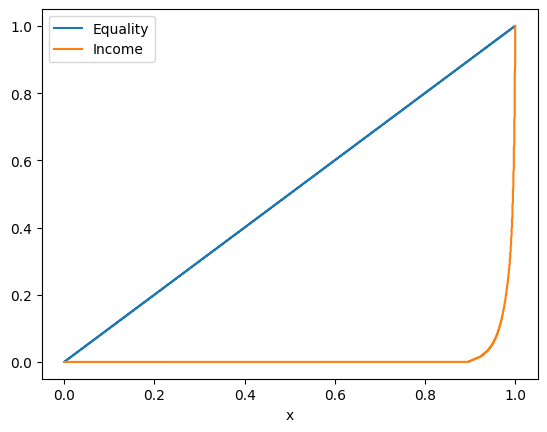

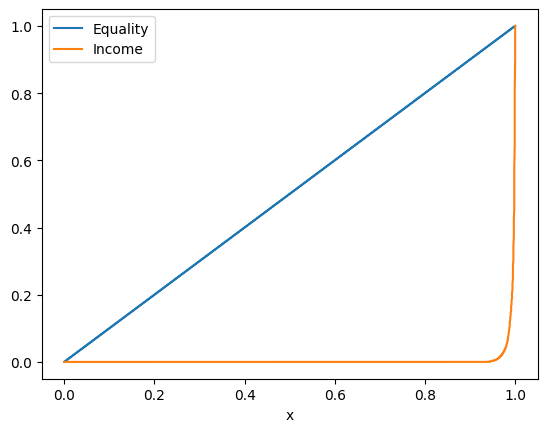

In [ ]:
dfh.groupby('network')['nact'].apply(_plot_gini, 'lorenz_nact_with0s')

### ¿Cuantos usuarios han participado? (excl. DAOs < 1% voting)

In [ ]:
_dfd = utils.get_df('dfd')

msk = (_dfd['nvoters'] / _dfd['hnusers']) > 0.01
allowed_daos = _dfd[msk].reset_index()
excluded_daos = _dfd[~msk].reset_index()

dfh_excl = dfh[dfh.dao.isin(allowed_daos['dao'])]

print(vc :=  dfh_excl.groupby('network')['hasAct?'].value_counts())

vc / (vc.groupby('network').sum()) * 100

network  hasAct?
mainnet  False      749
         True       631
xdai     False      298
         True       188
Name: hasAct?, dtype: int64


network  hasAct?
mainnet  False      54.275362
         True       45.724638
xdai     False      61.316872
         True       38.683128
Name: hasAct?, dtype: float64

In [ ]:
# Can't do it, gives an error
# sns.histplot(dfh_excl, x='nact', hue='network', log_scale=True)

In [ ]:
excluded_daos

network                                         dao  \
0   mainnet  0x45cf7d5c503b6417d570929368b8f4c4567ad9eb   
1   mainnet  0x6191cb94a29a3ca870adea25cd72e995303c2848   
2   mainnet  0x6bee9b81e434f7afce72a43a4016719315069539   
3      xdai  0x08ff281d4d8b41abcd4094c706463a64c0519b86   
4      xdai  0x194d3120fa4b4edfe5c133d7dfc9cff222c6e02e   
5      xdai  0x1e3a036f12cb0491a89dca54032511149f0f88b6   
6      xdai  0x1ea9426f006a6f335f753ccc4ee1d11bbd67b53f   
7      xdai  0x471a6ac623941a337732b4ed7b1a2529de78d394   
8      xdai  0x525d05a99fe8ed40682722b5ea2832bd8b9c821d   
9      xdai  0x5a59510248e67b4cd271d6530158e449e16f5031   
10     xdai  0x5e4f70a1e25f19f66474004e0dc3aeb6800f2cb4   
11     xdai  0x7e32ca59ce7162b320459377008da294a09e1b6c   
12     xdai  0x7fb0d3ea1cdc8d1d52f0827d08d142d09156468c   
13     xdai  0x819f1a1aa7a2aba6c3951839ba743418e3ff9c54   
14     xdai  0x8294201bbdebe9950bf19c866556461c7f38deda   
15     xdai  0x8bb1df918669b3cdea18de82ccf7d71c0b0ba516   
16     xdai  0x932b5763ccc0f81ee3934c94a279a3d02e3ad9ef   
17     xdai  0x999a3bc32267e4bdd9d3c0b41a1ab95e7634e317   
18     xdai  0x9df794aaaf05f04fd5b832b843aaf6b6edfdb7fb   
19     xdai  0xb4fa0fc57967221c8f56a11c81ff7a0e9a0b4e10   
20     xdai  0xb68866851ede2891ff75b53d9b586b9fb522190e   
21     xdai  0xc16170f689dfde9e4f099bccb0c3ff7cd7f0b8ee   
22     xdai  0xcf78ae0ba5c8d04d73c5c37c5385b608b7e1fb56   
23     xdai  0xcff210fcdec2c7b6330277577a719f7b54fb1549   
24     xdai  0xe248a76a4a84667c859eb51b9af6dea29e52f139   
25     xdai  0xe8e87ff30bbc85edb04f93c2f9644d9725db811f   
26     xdai  0xea4dab6f7ded4a863417bed4247a07fe39eaf17e   
27     xdai  0xf3762a867f6ef7538101fa8ea86870d29b6d7cde   
28     xdai  0xfa19f292b400579794e2e3cc0d4b6559482b9d94   
29     xdai  0xfb900830991dd238b78a1704ec9dc41e39da49bc   

                                            id                     name  \
0   0x45cf7d5c503b6417d570929368b8f4c4567ad9eb                 BuffiDAO   
1   0x6191cb94a29a3ca870adea25cd72e995303c2848            Fortmatic DAO   
2   0x6bee9b81e434f7afce72a43a4016719315069539          Kyber DAO Exp#2   
3   0x08ff281d4d8b41abcd4094c706463a64c0519b86                QuorumDAO   
4   0x194d3120fa4b4edfe5c133d7dfc9cff222c6e02e              Type of DAO   
5   0x1e3a036f12cb0491a89dca54032511149f0f88b6             KyberHackDAO   
6   0x1ea9426f006a6f335f753ccc4ee1d11bbd67b53f            Liquality DAO   
7   0x471a6ac623941a337732b4ed7b1a2529de78d394     Cosmos Ethermint DAO   
8   0x525d05a99fe8ed40682722b5ea2832bd8b9c821d                Skale DAO   
9   0x5a59510248e67b4cd271d6530158e449e16f5031                iExec DAO   
10  0x5e4f70a1e25f19f66474004e0dc3aeb6800f2cb4            Ethermint DAO   
11  0x7e32ca59ce7162b320459377008da294a09e1b6c                Skale DAO   
12  0x7fb0d3ea1cdc8d1d52f0827d08d142d09156468c           Lendroid Taleb   
13  0x819f1a1aa7a2aba6c3951839ba743418e3ff9c54             ETC Labs DAO   
14  0x8294201bbdebe9950bf19c866556461c7f38deda               Secret DAO   
15  0x8bb1df918669b3cdea18de82ccf7d71c0b0ba516            Fortmatic DAO   
16  0x932b5763ccc0f81ee3934c94a279a3d02e3ad9ef                     3Box   
17  0x999a3bc32267e4bdd9d3c0b41a1ab95e7634e317  Chainlink EthDenver DAO   
18  0x9df794aaaf05f04fd5b832b843aaf6b6edfdb7fb            Ethermint DAO   
19  0xb4fa0fc57967221c8f56a11c81ff7a0e9a0b4e10            UX Awards DAO   
20  0xb68866851ede2891ff75b53d9b586b9fb522190e            Celer Network   
21  0xc16170f689dfde9e4f099bccb0c3ff7cd7f0b8ee             ETC Labs DAO   
22  0xcf78ae0ba5c8d04d73c5c37c5385b608b7e1fb56                 MetaGame   
23  0xcff210fcdec2c7b6330277577a719f7b54fb1549                iExec DAO   
24  0xe248a76a4a84667c859eb51b9af6dea29e52f139                 BuffiDAO   
25  0xe8e87ff30bbc85edb04f93c2f9644d9725db811f              Type of DAO   
26  0xea4dab6f7ded4a863417bed4247a07fe39eaf17e              MakerDAODAO   
27  0xf3762a867f6ef7538101fa8ea86870d29b6d7cde           Redolent Banjo   

# Minimum number of users needed for absolute majority

- [ ] TODO: Revisar esto

In [ ]:
dfd = utils.change_unregistered_names(utils.get_df('dfd').reset_index()).set_index(['network', 'dao'])
dfd = utils.dropDAOsTable(dfd)
dfh = utils.get_df('dfh').astype({'balance': float})

# TODO: ¿Esto no tiene un "nombre"? ¿O me lo acabo de inventar?

# Voy mal...
def _peoplePct(s, pct=0.50) -> int:
    """ Number of people that is needed to surpass that percentage
    > E.g: with pct=0.10, the function will return the 
    > **minimum** number of people that hold more than 10% of the reputation
    """
    
    # Idea: Cogemos el peso rel. acum. y vemos cuando se supera ese porcentaje
    s = s.sort_values(ascending=False)
    mask = (s.cumsum() / s.sum()) < (pct)
        
    number = (mask).sum() + 1 # La suma acumulativa está "desplazada"
    
    # assert (s.cumsum() / s.sum()).searchsorted(pct, side='left') + 1 == number
    return (s.cumsum() / s.sum()).searchsorted(pct, side='right') + 1
    
# 2. Get the value that "causes" the median balance
dfd['min_users_majority'] = dfh.groupby(['network', 'dao'])['balance'].apply(_peoplePct)
dfd['min_users_majority_pct'] = dfd['min_users_majority'] / dfd['nusers']

assert not (dfd['min_users_majority'] > dfd['hnusers']).any(), 'Minimum number of users for majority can\'t be greater than the number of users'
assert not (dfd['min_users_majority_pct'] > 1).any(), 'All percentages should be less than 1'

display(dfd)

_dfd = dfd.copy()
_dfd['min_users_majority_pct'] = _dfd['min_users_majority_pct'] * 100
px.bar(_dfd.reset_index(), x='name', y='min_users_majority_pct', color='network', hover_data=['nusers', 'min_users_majority', 'nproposals'], range_y=[0,50])

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning: Some DAOs were already filtered in dropDAOsTable
  warnings.warn('Some DAOs were already filtered in dropDAOsTable')


id  \
network dao                                                                                      
mainnet 0x0b93ba560283350d4216f29dc57e15df38d0eace  0x0b93ba560283350d4216f29dc57e15df38d0eace   
        0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6  0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6   
        0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd  0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd   
        0x294f999356ed03347c7a23bcbcf8d33fa41dc830  0x294f999356ed03347c7a23bcbcf8d33fa41dc830   
        0x2b8c70fffda7f3d7667f7cfede1429313886329c  0x2b8c70fffda7f3d7667f7cfede1429313886329c   
        0x3324b516df92e78463d8b0616dd146cf6c58b0b9  0x3324b516df92e78463d8b0616dd146cf6c58b0b9   
        0x440583455bcd85ab2bd429c015d3aabcae135f0a  0x440583455bcd85ab2bd429c015d3aabcae135f0a   
        0x519b70055af55a007110b4ff99b0ea33071c720a  0x519b70055af55a007110b4ff99b0ea33071c720a   
        0x61151f7ef32c920794ed89b2545f1672266d6420  0x61151f7ef32c920794ed89b2545f1672266d6420   
        0x6bee9b81e434f7afce72a43a4016719315069539  0x6bee9b81e434f7afce72a43a4016719315069539   
        0x8990e11b69403ea53ef2b32434bbd7dbf84b5234  0x8990e11b69403ea53ef2b32434bbd7dbf84b5234   
        0xafdd1eb2511cd891acf2bff82dabf47e0c914d24  0xafdd1eb2511cd891acf2bff82dabf47e0c914d24   
        0xbe1a98d3452f6da6e0984589e545d4fc25af7526  0xbe1a98d3452f6da6e0984589e545d4fc25af7526   
        0xd358d4f159e6fae32d1b6096bdace829a5fe33fb  0xd358d4f159e6fae32d1b6096bdace829a5fe33fb   
        0xe56b4d8d42b1c9ea7dda8a6950e3699755943de7  0xe56b4d8d42b1c9ea7dda8a6950e3699755943de7   
        0xe8e1d0f1783b22ff409deb14fa5acc9cce2a3d15  0xe8e1d0f1783b22ff409deb14fa5acc9cce2a3d15   
        0xee7fa430a7e513d3df962ed0c0e285bc6f87fc24  0xee7fa430a7e513d3df962ed0c0e285bc6f87fc24   
        0xf931ff012cbff471cccb90a784e3e88b512c890a  0xf931ff012cbff471cccb90a784e3e88b512c890a   
xdai    0x2b0f5e7de201068d9fb917ab86dc1c731c274411  0x2b0f5e7de201068d9fb917ab86dc1c731c274411   
        0x32c3bc85fa32f958323ad2c0a51839021a0f1ac2  0x32c3bc85fa32f958323ad2c0a51839021a0f1ac2   
        0x4b88dc0533b983cfd4a042b93cdd587cba9a28e2  0x4b88dc0533b983cfd4a042b93cdd587cba9a28e2   
        0x8766cab508a87536b8691ace8814b517b95f7b75  0x8766cab508a87536b8691ace8814b517b95f7b75   
        0xafa82df1cd041d93655d474062e42929471ea69a  0xafa82df1cd041d93655d474062e42929471ea69a   
        0xb3d9283ec311ea93ed9e56dce1cf7a15da071512  0xb3d9283ec311ea93ed9e56dce1cf7a15da071512   
        0xe248a76a4a84667c859eb51b9af6dea29e52f139  0xe248a76a4a84667c859eb51b9af6dea29e52f139   
        0xe716ec63c5673b3a4732d22909b38d779fa47c3f  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   

                                                                                 name  \
network dao                                                                             
mainnet 0x0b93ba560283350d4216f29dc57e15df38d0eace                            CuraDAO   
        0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6                               dOrg   
        0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd                           PrimeDAO   
        0x294f999356ed03347c7a23bcbcf8d33fa41dc830                      Genesis Alpha   
        0x2b8c70fffda7f3d7667f7cfede1429313886329c                          ETHGlobal   
        0x3324b516df92e78463d8b0616dd146cf6c58b0b9                             efxDAO   
        0x440583455bcd85ab2bd429c015d3aabcae135f0a                           PolkaDAO   
        0x519b70055af55a007110b4ff99b0ea33071c720a                              dxDAO   
        0x61151f7ef32c920794ed89b2545f1672266d6420              The General Store DAO   
        0x6bee9b81e434f7afce72a43a4016719315069539                    Kyber DAO Exp#2   
        0x8990e11b69403ea53ef2b32434bbd7dbf84b5234                            FestDAO   
        0xafdd1eb2511cd891acf2bff82dabf47e0c914d24                                1UP   
        0xbe1a98d3452f6da6e0984589e545d4fc25af7526         dOrg (unregistered 0xbe1a)   
        0xd3

## How many of the users between dxDAO / xDXdao are the same 

In [ ]:
def _peoplePctAddr(gr, pct = .5):
    # Idea: Cogemos el peso rel. acum. y vemos cuando se supera ese porcentaje
    gr = gr.sort_values('balance', ascending=False)
    n = _peoplePct(gr['balance'], pct)

    return np.array(gr['address'].head(n))

dfd['min_users_majority_address'] = dfh.groupby(['network', 'dao']).apply(_peoplePctAddr)
# dfd['len(min_users_majority_address)'] = dfh.groupby(['network', 'dao']).apply(_peoplePctAddr).apply(len)
dxdao_users = dfd[dfd['originalName'] == 'dxDAO'].iloc[0]['min_users_majority_address']
xdxdao_users = dfd[dfd['originalName'] == 'xDXdao'].iloc[0]['min_users_majority_address']
print(len(dxdao_users), len(xdxdao_users))
print(len(np.intersect1d(dxdao_users, xdxdao_users)))

16 14
8


## Table mode

- nº de usuarios
- actividad
- min_users_majority_pct?

[Task](https://daviddavo.github.io/daostack-notebooks/#/page/63d160f5-4b12-4c67-9e42-0f78f14609f1)

In [ ]:
dfd.nvoters

network  dao                                       
mainnet  0x0b93ba560283350d4216f29dc57e15df38d0eace     11.0
         0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6     17.0
         0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd      5.0
         0x294f999356ed03347c7a23bcbcf8d33fa41dc830    128.0
         0x2b8c70fffda7f3d7667f7cfede1429313886329c     24.0
         0x3324b516df92e78463d8b0616dd146cf6c58b0b9     11.0
         0x440583455bcd85ab2bd429c015d3aabcae135f0a     24.0
         0x519b70055af55a007110b4ff99b0ea33071c720a    134.0
         0x61151f7ef32c920794ed89b2545f1672266d6420      6.0
         0x6bee9b81e434f7afce72a43a4016719315069539     32.0
         0x8990e11b69403ea53ef2b32434bbd7dbf84b5234     15.0
         0xafdd1eb2511cd891acf2bff82dabf47e0c914d24      4.0
         0xbe1a98d3452f6da6e0984589e545d4fc25af7526     19.0
         0xd358d4f159e6fae32d1b6096bdace829a5fe33fb     10.0
         0xe56b4d8d42b1c9ea7dda8a6950e3699755943de7     39.0
         0xe8e1d0f1783b22ff409deb

count    20.000000
mean      0.479284
std       0.317287
min       0.012351
25%       0.158296
50%       0.539541
75%       0.682339
max       0.957258
Name: vp gini, dtype: float64
saving to ../logseq/assets/nb_tables/equality/min_users_mayority.png
/usr/bin/chromium
Use ![Usuarios necesarios para la mayoría absoluta](assets/nb_tables/equality/min_users_mayority.png) to embed it in logseq


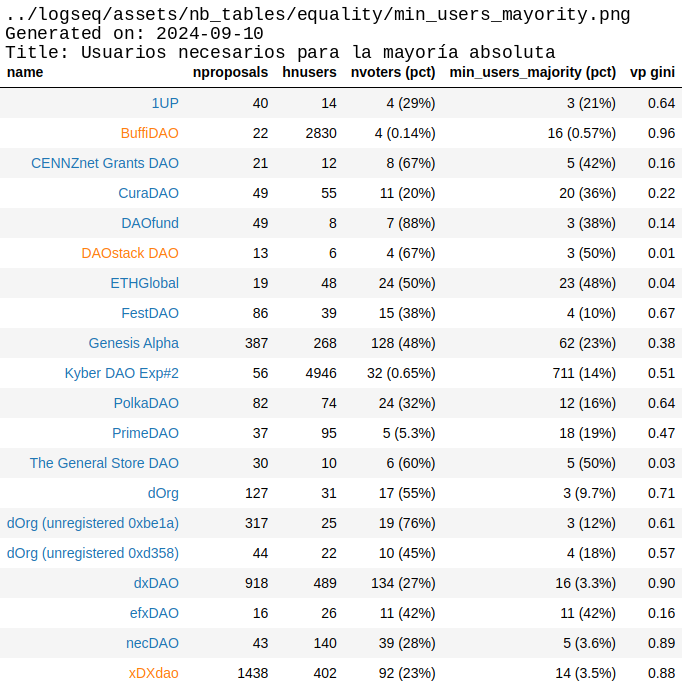

In [ ]:
COLUMNS = ['name', 'nproposals', 'hnusers', 'nvoters (pct)', 'min_users_majority (pct)', 'vp gini']
INT_COLS = ['hnusers']
HIDDEN_COLS = ['network', 'min_users_majority_pct']
COLUMNS_RENAME = {
    'name': 'Nombre',
    'cntActivity': 'Actividades',
    'hnusers': 'Número de usuarios',
    'min_users_majority (pct)': 'Usuarios necesarios para la may. absoluta (pct)',
}

dfhgb = dfh.groupby(['network', 'dao'])
dfd['vp gini'] = dfhgb['balance'].agg(lambda x: ineqpy.inequality.gini(x.to_numpy()))
dfd['vp lac'] = dfhgb['balance'].agg(lambda x: utils.functions.lac(x.to_numpy()))

_table = dfd.reset_index()
_table = _table.sort_values('nproposals', ascending=False).head(20)
_table['min_users_majority_pct'] = _table['min_users_majority']/_table['hnusers']*100
_table = utils.tables.add_pct_col(_table, 'min_users_majority', 'hnusers')
_table = utils.tables.add_pct_col(_table, 'nvoters', 'hnusers')
_table = _table[COLUMNS + HIDDEN_COLS] # .rename(columns=COLUMNS_RENAME) # .set_index('Nombre')
_table = _table.sort_values('name')

s = _table.style.apply(utils.tables.nameColorByNetwork, axis=None) \
    .hide(HIDDEN_COLS, 'columns') \
    .format('{:.2f}'.format, subset=['vp gini']) \
    .format('{:.0f}'.format, subset=INT_COLS) \
    .hide(axis='index')

print(_table['vp gini'].describe())

display(utils.tables.save_table_image(s, 'equality/min_users_mayority.png', title="Usuarios necesarios para la mayoría absoluta", debug=True))
HTML('<h3>Usuarios necesarios para la mayoría absoluta ordenados alfabéticamente</h3>' + s.to_html(
    header=True,
))

In [ ]:
_table.median()

saving to ../logseq/assets/nb_figures/equality/scatterplot_hnusers_vp gini.png
Figure is Axes
Use ![](../assets/nb_figures/equality/scatterplot_hnusers_vp gini.png) to embed it in logseq


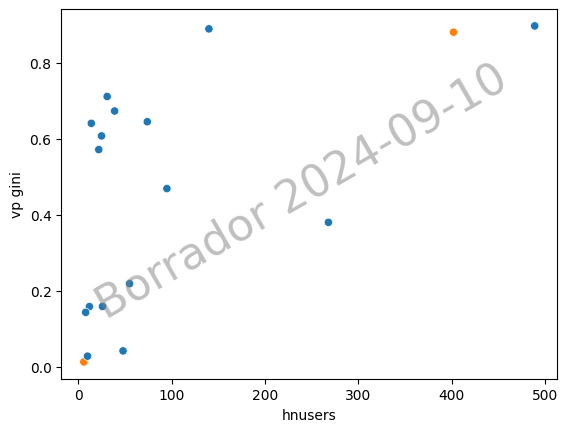

In [ ]:
fig = sns.scatterplot(_table[_table['hnusers']<2000], x='hnusers', y='vp gini', hue='network', legend=False, hue_order=['mainnet', 'xdai'])

utils.plot.save_fig(
    fig,
    "equality/scatterplot_hnusers_vp gini.png", debug=True,
)

saving to ../logseq/assets/nb_figures/equality/scatterplot_hnusers_vp gini log.png
Figure is Axes
Use ![](../assets/nb_figures/equality/scatterplot_hnusers_vp gini log.png) to embed it in logseq


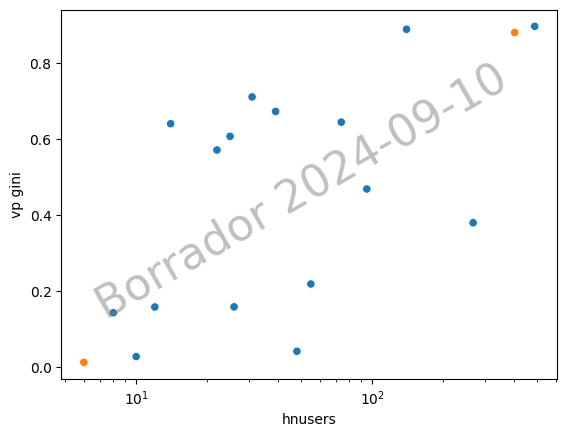

In [ ]:
fig = sns.scatterplot(_table[_table['hnusers']<2000], x='hnusers', y='vp gini', hue='network', legend=False, hue_order=['mainnet', 'xdai'])
fig.set(xscale='log')

utils.plot.save_fig(
    fig,
    "equality/scatterplot_hnusers_vp gini log.png", debug=True,
)

saving to ../logseq/assets/nb_figures/equality/scatterplot_hnusers_vp mpm.png
Figure is Axes
Use ![](../assets/nb_figures/equality/scatterplot_hnusers_vp mpm.png) to embed it in logseq


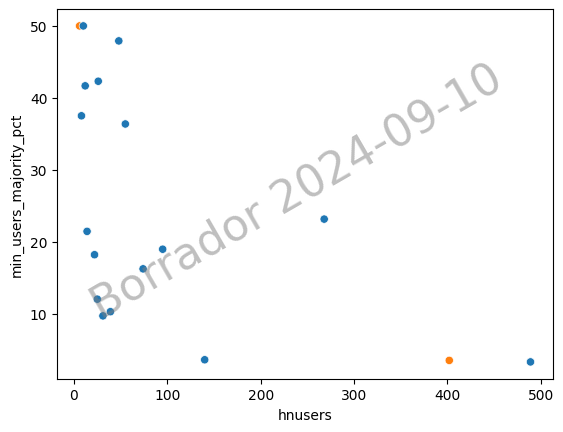

In [ ]:
fig = sns.scatterplot(_table[_table['hnusers']<2000], x='hnusers', y='min_users_majority_pct', hue='network', legend=False, hue_order=['mainnet', 'xdai'])

utils.plot.save_fig(
    fig,
    "equality/scatterplot_hnusers_vp mpm.png", debug=True,
)

saving to ../logseq/assets/nb_figures/equality/scatterplot_hnusers_vp mpm_log.png
Figure is Axes
Use ![](../assets/nb_figures/equality/scatterplot_hnusers_vp mpm_log.png) to embed it in logseq


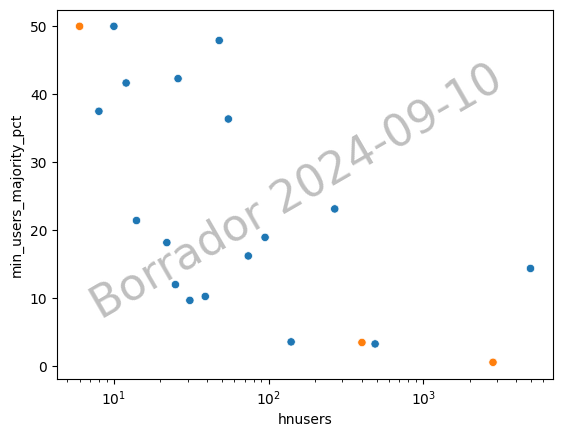

In [ ]:
fig = sns.scatterplot(_table, x='hnusers', y='min_users_majority_pct', hue='network', legend=False, hue_order=['mainnet', 'xdai'])
fig.set(xscale='log')

utils.plot.save_fig(
    fig,
    "equality/scatterplot_hnusers_vp mpm_log.png", debug=True,
)

In [ ]:
dfd.columns

Index(['id', 'name', 'register', 'nativeToken', 'nativeReputation', 'nusers',
       'hnusers', 'firstUser', 'firstActivity', 'lastActivity', 'lastVote',
       'cntActivity', 'nvotes', 'nstakes', 'nproposals',
       'monthsSinceFirstUser', 'monthSinceFirstActivity',
       'monthsSinceLastActivity', 'monthsWithActivity', 'monthsWithProposals',
       'pctActive', 'pctApproved', 'pctBoosted', 'pctStaked', 'vpp', 'spp',
       'TP', 'TN', 'FP', 'FN', 'precision', 'precision_boosted',
       'precision_nonboosted', 'nvoters', 'nproposers', 'shortid', 'group',
       'originalName', 'min_users_majority', 'min_users_majority_pct',
       'min_users_majority_address', 'vp gini', 'vp lac'],
      dtype='object')

In [ ]:
COLUMNS = ['name', 'cntActivity', 'min_users_majority', 'min_users_majority_pct']

_table = dfd[dfd['cntActivity'] > 10]
_table = _table.sort_values('cntActivity')
_table = _table[COLUMNS].rename(columns=COLUMNS_RENAME).set_index('Nombre')
HTML('<h3>Usuarios necesarios para la mayoría absoluta ordenados por actividad</h3>' + _table.to_html(
    header=True,
))

In [ ]:
from IPython.display import display, Latex, Markdown, HTML

COLUMNS = ['name', 'cntActivity', 'hnusers', 'min_users_majority', 'min_users_majority_pct']

_table = dfd[dfd['cntActivity'] > 10]
_table = _table.sort_values('cntActivity')
_table = _table[COLUMNS].rename(columns=COLUMNS_RENAME).set_index('Nombre')
HTML('<h3>Usuarios necesarios para la mayoría absoluta ordenados por actividad</h3>' + _table.to_html(
    header=True,
))

In [ ]:
from IPython.display import display, Latex, Markdown, HTML

COLUMNS = ['name', 'min_users_majority_pct', 'min_users_majority', 'hnusers',]

_table = dfd[~pd.isna(dfd['min_users_majority_pct']) & (dfd['hnusers'] > 10)]
_table = _table.sort_values('min_users_majority_pct')
_table = _table[COLUMNS].rename(columns=COLUMNS_RENAME).set_index('Nombre')
HTML('<h3>Usuarios necesarios para la mayoría absoluta ordenados por porcentaje</h3>' + _table.to_html(
    header=True,
))

## Version del paper

In [ ]:
_dfd# .drop(columns=['network'])

id  \
network dao                                                                                      
mainnet 0x0b93ba560283350d4216f29dc57e15df38d0eace  0x0b93ba560283350d4216f29dc57e15df38d0eace   
        0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6  0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6   
        0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd  0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd   
        0x294f999356ed03347c7a23bcbcf8d33fa41dc830  0x294f999356ed03347c7a23bcbcf8d33fa41dc830   
        0x2b8c70fffda7f3d7667f7cfede1429313886329c  0x2b8c70fffda7f3d7667f7cfede1429313886329c   
        0x3324b516df92e78463d8b0616dd146cf6c58b0b9  0x3324b516df92e78463d8b0616dd146cf6c58b0b9   
        0x440583455bcd85ab2bd429c015d3aabcae135f0a  0x440583455bcd85ab2bd429c015d3aabcae135f0a   
        0x519b70055af55a007110b4ff99b0ea33071c720a  0x519b70055af55a007110b4ff99b0ea33071c720a   
        0x61151f7ef32c920794ed89b2545f1672266d6420  0x61151f7ef32c920794ed89b2545f1672266d6420   
        0x6bee9b81e434f7afce72a43a4016719315069539  0x6bee9b81e434f7afce72a43a4016719315069539   
        0x8990e11b69403ea53ef2b32434bbd7dbf84b5234  0x8990e11b69403ea53ef2b32434bbd7dbf84b5234   
        0xafdd1eb2511cd891acf2bff82dabf47e0c914d24  0xafdd1eb2511cd891acf2bff82dabf47e0c914d24   
        0xbe1a98d3452f6da6e0984589e545d4fc25af7526  0xbe1a98d3452f6da6e0984589e545d4fc25af7526   
        0xd358d4f159e6fae32d1b6096bdace829a5fe33fb  0xd358d4f159e6fae32d1b6096bdace829a5fe33fb   
        0xe56b4d8d42b1c9ea7dda8a6950e3699755943de7  0xe56b4d8d42b1c9ea7dda8a6950e3699755943de7   
        0xe8e1d0f1783b22ff409deb14fa5acc9cce2a3d15  0xe8e1d0f1783b22ff409deb14fa5acc9cce2a3d15   
        0xee7fa430a7e513d3df962ed0c0e285bc6f87fc24  0xee7fa430a7e513d3df962ed0c0e285bc6f87fc24   
        0xf931ff012cbff471cccb90a784e3e88b512c890a  0xf931ff012cbff471cccb90a784e3e88b512c890a   
xdai    0x2b0f5e7de201068d9fb917ab86dc1c731c274411  0x2b0f5e7de201068d9fb917ab86dc1c731c274411   
        0x32c3bc85fa32f958323ad2c0a51839021a0f1ac2  0x32c3bc85fa32f958323ad2c0a51839021a0f1ac2   
        0x4b88dc0533b983cfd4a042b93cdd587cba9a28e2  0x4b88dc0533b983cfd4a042b93cdd587cba9a28e2   
        0x8766cab508a87536b8691ace8814b517b95f7b75  0x8766cab508a87536b8691ace8814b517b95f7b75   
        0xafa82df1cd041d93655d474062e42929471ea69a  0xafa82df1cd041d93655d474062e42929471ea69a   
        0xb3d9283ec311ea93ed9e56dce1cf7a15da071512  0xb3d9283ec311ea93ed9e56dce1cf7a15da071512   
        0xe248a76a4a84667c859eb51b9af6dea29e52f139  0xe248a76a4a84667c859eb51b9af6dea29e52f139   
        0xe716ec63c5673b3a4732d22909b38d779fa47c3f  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   

                                                                                 name  \
network dao                                                                             
mainnet 0x0b93ba560283350d4216f29dc57e15df38d0eace                            CuraDAO   
        0x15344ecdc2c4edfcb092e284d93c20f0529fd8a6                               dOrg   
        0x273d0f686a53a49a0fba2a801566b19f9aaf8fcd                           PrimeDAO   
        0x294f999356ed03347c7a23bcbcf8d33fa41dc830                      Genesis Alpha   
        0x2b8c70fffda7f3d7667f7cfede1429313886329c                          ETHGlobal   
        0x3324b516df92e78463d8b0616dd146cf6c58b0b9                             efxDAO   
        0x440583455bcd85ab2bd429c015d3aabcae135f0a                           PolkaDAO   
        0x519b70055af55a007110b4ff99b0ea33071c720a                              dxDAO   
        0x61151f7ef32c920794ed89b2545f1672266d6420              The General Store DAO   
        0x6bee9b81e434f7afce72a43a4016719315069539                    Kyber DAO Exp#2   
        0x8990e11b69403ea53ef2b32434bbd7dbf84b5234                            FestDAO   
        0xafdd1eb2511cd891acf2bff82dabf47e0c914d24                                1UP   
        0xbe1a98d3452f6da6e0984589e545d4fc25af7526         dOrg (unregistered 0xbe1a)   
        0xd3

In [ ]:
dfd.columns

Index(['id', 'name', 'register', 'nativeToken', 'nativeReputation', 'nusers',
       'hnusers', 'firstUser', 'firstActivity', 'lastActivity', 'lastVote',
       'cntActivity', 'nvotes', 'nstakes', 'nproposals',
       'monthsSinceFirstUser', 'monthSinceFirstActivity',
       'monthsSinceLastActivity', 'monthsWithActivity', 'monthsWithProposals',
       'pctActive', 'pctApproved', 'pctBoosted', 'pctStaked', 'vpp', 'spp',
       'TP', 'TN', 'FP', 'FN', 'precision', 'precision_boosted',
       'precision_nonboosted', 'nvoters', 'nproposers', 'shortid', 'group',
       'originalName', 'min_users_majority', 'min_users_majority_pct',
       'min_users_majority_address', 'vp gini', 'vp lac'],
      dtype='object')

In [ ]:
DISPLAY_COLS = [
    'name', 
    'monthsWithActivity', 
    'firstActivity', 
    'hnusers',
    # 'nvoters (pct)', 
    'pctVoters',
    'nproposals', 
    'pctApproved', 
    'pctBoosted', 
    'vpp', 
    'spp', 
    'napproved (pct)', 
    'precision', 
    'min_users_majority (pct)',
]

def _format_table_paper(dfd, latex: bool=False):
    _table = dfd.copy()
    # _table['nvoters (pct)'] = _table['nvoters'].apply(lambda x: f'{x:.0f}') + ' ' + (_table['nvoters']/_table['hnusers']).apply(utils.tables.custom_pct_format)
    _table['pctVoters'] = _table['nvoters'] / _table['hnusers']
    _table = utils.tables.add_pct_col(_table, 'nvoters', 'hnusers', latex=latex)
    _table = utils.tables.add_pct_col(_table, 'nproposers', 'hnusers', latex=latex)
    
    _table['napproved'] = _table['nproposals']*_table['pctApproved']
    _table = utils.tables.add_pct_col(_table, 'napproved', 'nproposals', latex=latex)
    _table = utils.tables.add_pct_col(_table, 'min_users_majority', 'hnusers', latex=latex)
    # Número de meses entre first y last Activity
    # _table['diff'] = np.ceil((_table['lastVote'] - _table['firstActivity'])/np.timedelta64(1, 'M'))
    
    # _table = utils.dropDAOs(_table)
    _table = utils.append_dao_names(_table.drop(columns=['name']))
    _table = _table.droplevel('network').sort_values(['network', 'monthsWithActivity'], axis=0, ascending=[True,False])
    # _table = _table.sort_values('name', key=lambda x: x.str.lower())
    
    _table = _table[['network'] + DISPLAY_COLS]
    
    # Set color of table and hide some columns
    s = _table.style \
        .hide(['network', 'napproved (pct)', 'pctBoosted', 'vpp', 'spp'], 'columns') \
        .hide(axis='index') \
        .format(lambda d:d.strftime('%b \'%y') if not pd.isna(d) else d, subset=['firstActivity']) \
        .format(lambda d:f'{d:.0f}', subset=['monthsWithActivity', 'hnusers']) \
        .format(lambda d:f'{d*100:.3g}%', subset=['pctVoters', 'pctApproved', 'pctBoosted', 'precision']) \
        .format(lambda d:f'{d:.2g}', subset=['vpp', 'spp'])
    # utils.tables.save_table_image(s, "DAOs/resumen.png")
    assert len(_table) == 26, 'There should be 26 daos'
    s.apply(utils.tables.nameColorByNetwork, axis=None, latex=latex)
    return s

print(_format_table_paper(_dfd, latex=True)
      .to_latex(siunitx=True)
      .replace('%', '\%')
      .replace('{#', '{')
      .replace('#', '\#')
      .replace('(unregistered ', '(')
     )
_format_table_paper(_dfd)

\begin{tabular}{lSlSSSSSl}
{name} & {monthsWithActivity} & {firstActivity} & {hnusers} & {pctVoters} & {nproposals} & {pctApproved} & {precision} & {min_users_majority (pct)} \\
\color[HTML]{1f77b4} dxDAO & 46 & Jul '19 & 489 & 27.4\% & 918 & 86.1\% & 98.8\% & 16 \mypc{3.3} \\
\color[HTML]{1f77b4} necDAO & 20 & Jan '20 & 140 & 27.9\% & 43 & 65.1\% & 88.4\% & 5 \mypc{3.6} \\
\color[HTML]{1f77b4} Genesis Alpha & 18 & Apr '19 & 268 & 47.8\% & 387 & 70.3\% & 97.2\% & 62 \mypc{23} \\
\color[HTML]{1f77b4} CuraDAO & 17 & Aug '19 & 55 & 20\% & 49 & 79.6\% & 95.9\% & 20 \mypc{36} \\
\color[HTML]{1f77b4} dOrg & 16 & Mar '20 & 31 & 54.8\% & 127 & 95.3\% & 55.9\% & 3 \mypc{9.7} \\
\color[HTML]{1f77b4} PolkaDAO & 15 & May '19 & 74 & 32.4\% & 82 & 76.8\% & 97.6\% & 12 \mypc{16} \\
\color[HTML]{1f77b4} dOrg (0xbe1a) & 12 & May '19 & 25 & 76\% & 317 & 85.2\% & 21.8\% & 3 \mypc{12} \\
\color[HTML]{1f77b4} PrimeDAO & 10 & Dec '20 & 95 & 5.26\% & 37 & 73\% & 97.3\% & 18 \mypc{19} \\
\color[HTML]{1f77b4} 

# Igualdad

Nota: Calculamos la distribución a fecha de salida de los datos

187.43120227737072

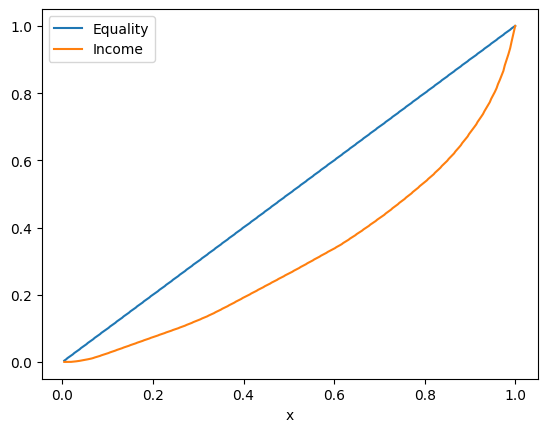

In [ ]:
GENESIS_IDX = dfd[dfd['name'] == 'Genesis Alpha'].iloc[0].name

dfhg = dfh.set_index(['network', 'dao']).sort_index().loc[GENESIS_IDX].reset_index()
ineqpy.inequality.lorenz(dfhg['balance'].to_numpy()).plot()

utils.functions.lac(dfhg['balance'].to_numpy())

19.122825350996035

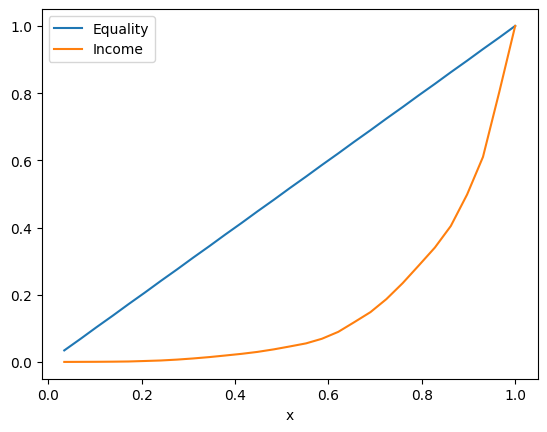

In [ ]:
DORG_IDX = dfd[(dfd['name'] == 'dOrg') & (dfd['register'] == 'registered')].iloc[0].name

dfhd = dfh.set_index(['network', 'dao']).sort_index().loc[DORG_IDX].reset_index()
ineqpy.inequality.lorenz(dfhd['balance'].to_numpy()).plot()

utils.functions.lac(dfhd['balance'].to_numpy())

121.12620758107217

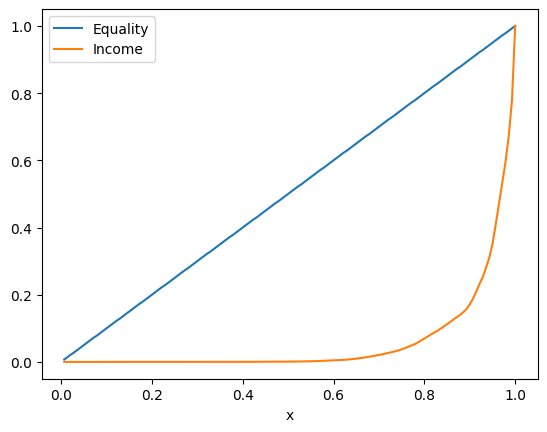

In [ ]:
NECDAO_IDX = dfd[(dfd['name'] == 'necDAO')].iloc[0].name
dfhn = dfh.set_index(['network', 'dao']).sort_index().loc[NECDAO_IDX].reset_index()
ineqpy.inequality.lorenz(dfhn['balance'].to_numpy()).plot()

utils.functions.lac(dfhn['balance'].to_numpy())

In [ ]:
functions = [
    # sum,
    # ineqpy.inequality.mean,
    # np.median,
    ineqpy.inequality.gini,
    utils.functions.lac,
    # ineqpy.inequality.atkinson,
    # ineqpy.inequality.theil,
    # ineqpy.inequality.top_rest,
    # ineqpy.inequality.hoover,
]

def gen_dfd_eq(col):
    dfhgb = dfh.groupby(['network', 'dao'])
    # dfd_eq = utils.dropDAOs(dfd).copy() # already dropped above??
    dfd_eq = utils.dropDAOsTable(dfd).copy()
    
    # equality functions
    for f in tqdm(functions):
        def _wrapper(x):
            x = x.to_numpy()
            if x.sum() == 0:
                return np.nan
            return f(x)
        dfd_eq[f.__name__] = dfhgb[col].agg(_wrapper)
        
    return dfd_eq

def styled_dfd_eq(col):
    dfd_eq = gen_dfd_eq(col)
    
    DISPLAY_COLS = ['name', 'nusers', 'nvotes', 'nproposals'] + [f.__name__ for f in functions] + ['Usuarios mayoría (pct)']

    _table = dfd_eq.reset_index()
    _table = _table.sort_values('name')
    _table = utils.tables.add_pct_col(_table, 'min_users_majority', 'nusers', 'Usuarios mayoría (pct)')
    _table = _table[['network'] + DISPLAY_COLS]

    s = _table.style.apply(utils.tables.nameColorByNetwork, axis=None) \
        .hide('network', 'columns') \
        .hide(axis='index') \
        .format('{:.2f}'.format, subset=['gini', 'lac']) # 'atkinson', 'theil', 'top_rest', 'hoover', 'lac'])
        # .format('{:.2e}'.format, subset=['sum', 'mean', 'median']) \
    return s

## Reputación (voting power)

In [ ]:
utils.tables.save_table_image(styled_dfd_eq('balance'), "equality/reputation_voting_power.png", title="Métricas de distribución de la reputación")

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:148: UserWarning:

No DAOs dropped in dropDAOs

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:164: UserWarning:

No DAOs dropped in dropDAOsTable

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning:

Some DAOs were already filtered in dropDAOsTable

100%|████████████████████████████████████████████████████| 2/2 [00:00<00:00, 110.86it/s]


saving to ../logseq/assets/nb_tables/equality/reputation_voting_power.png
/usr/bin/chromium
Use ![Métricas de distribución de la reputación](assets/nb_tables/equality/reputation_voting_power.png) to embed it in logseq


## Cantidad stakeada

> Nota: no sabemos la cantidad de GEN de cada usuario, pero sí podemos saber qué cantidad han stakeado

In [ ]:
utils.tables.save_table_image(styled_dfd_eq('stakeAmount'), 'equality/staked_amount.png', title='Índices de igualdad cantidad GEN stakeado')

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:148: UserWarning:

No DAOs dropped in dropDAOs

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:164: UserWarning:

No DAOs dropped in dropDAOsTable

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning:

Some DAOs were already filtered in dropDAOsTable

100%|████████████████████████████████████████████████████| 2/2 [00:00<00:00, 120.38it/s]

saving to ../logseq/assets/nb_tables/equality/staked_amount.png
/usr/bin/chromium


Use ![Índices de igualdad cantidad GEN stakeado](assets/nb_tables/equality/staked_amount.png) to embed it in logseq


https://stackoverflow.com/collectives## Número de propuestas realizadas

In [ ]:
styled_dfd_eq('nproposals')

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:148: UserWarning:

No DAOs dropped in dropDAOs

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:164: UserWarning:

No DAOs dropped in dropDAOsTable

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning:

Some DAOs were already filtered in dropDAOsTable

100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 93.05it/s]


## Número de votos emitidos

In [ ]:
utils.tables.save_table_image(styled_dfd_eq('nvotes'), 'equality/nvotes.png', title='Métricas de igualdad por número de votos emitidos')

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:148: UserWarning:

No DAOs dropped in dropDAOs

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:164: UserWarning:

No DAOs dropped in dropDAOsTable

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning:

Some DAOs were already filtered in dropDAOsTable

100%|████████████████████████████████████████████████████| 2/2 [00:00<00:00, 101.44it/s]

saving to ../logseq/assets/nb_tables/equality/nvotes.png
/usr/bin/chromium


Use ![Métricas de igualdad por número de votos emitidos](assets/nb_tables/equality/nvotes.png) to embed it in logseq


## Total conteo actividad

In [ ]:
utils.tables.save_table_image(styled_dfd_eq('nact'), 'equality/nact.png', title='Total conteo de actividad por usuario')

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:148: UserWarning:

No DAOs dropped in dropDAOs

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:164: UserWarning:

No DAOs dropped in dropDAOsTable

/home/davo/Documents/GRASIA/daostack-notebooks/notebooks/utils/__init__.py:166: UserWarning:

Some DAOs were already filtered in dropDAOsTable

100%|█████████████████████████████████████████████████████| 2/2 [00:00<00:00, 92.60it/s]

saving to ../logseq/assets/nb_tables/equality/nact.png
/usr/bin/chromium


Use ![Total conteo de actividad por usuario](assets/nb_tables/equality/nact.png) to embed it in logseq


# Tabla resumen igualdad por Grupo

In [ ]:
dfh.groupby(['group', 'address']).sum(numeric_only=True)

balance  nvotes  \
group       address                                                        
1UP         0x1dac51886d5b461fccc784ad3813a5969dd42e6f   960.000       1   
            0x4171160db0e7e2c75a4973b7523b437c010dd9d4    53.000       0   
            0x4f0a1940de411285ad0455a7f40c81b5e0bc8492     8.000       0   
            0x5b93ff82faaf241c15997ea3975419dddd8362c5  1002.000       0   
            0x66b1de0f14a0ce971f7f248415063d44caf19398     1.000       0   
...                                                          ...     ...   
tBTC DAO    0x96600d0ed97c29ec3967bf8a1702032c46896bf6   990.000       1   
            0xb77a012b1686cdacf73cb3b2fb3048239e5e1c7c   990.000       1   
xDAItestDAO 0x00ce9f285d98f79b6ee9030e4e8f812650aa7e66  2146.419       3   
            0x06044b5359d8df7886366c22c61c7ecd29becac7  1089.500       3   
            0x3a5b03190ac4c01801bbc53ce014b48507adb7fd  1050.000       0   

                                                        nproposals  nstakes  \
group       address                                                           
1UP         0x1dac51886d5b461fccc784ad3813a5969dd42e6f           1        0   
            0x4171160db0e7e2c75a4973b7523b437c010dd9d4           1        1   
            0x4f0a1940de411285ad0455a7f40c81b5e0bc8492           2        0   
            0x5b93ff82faaf241c15997ea3975419dddd8362c5           1        0   
            0x66b1de0f14a0ce971f7f248415063d44caf19398           1        0   
...                                                            ...      ...   
tBTC DAO    0x96600d0ed97c29ec3967bf8a1702032c46896bf6           0        0   
            0xb77a012b1686cdacf73cb3b2fb3048239e5e1c7c           0        0   
xDAItestDAO 0x00ce9f285d98f79b6ee9030e4e8f812650aa7e66           4        0   
            0x06044b5359d8df7886366c22c61c7ecd29becac7           3        0   
            0x3a5b03190ac4c01801bbc53ce014b48507adb7fd           1        0   

                                                        stakeAmount  nact  
group       address                                                        
1UP         0x1dac51886d5b461fccc784ad3813a5969dd42e6f          0.0     2  
            0x4171160db0e7e2c75a4973b7523b437c010dd9d4        180.0     2  
            0x4f0a1940de411285ad0455a7f40c81b5e0bc8492          0.0     2  
            0x5b93ff82faaf241c15997ea3975419dddd8362c5          0.0     1  
            0x66b1de0f14a0ce971f7f248415063d44caf19398          0.0     1  
...                                                             ...   ...  
tBTC DAO    0x96600d0ed97c29ec3967bf8a1702032c46896bf6          0.0     1  
            0xb77a012b1686cdacf73cb3b2fb3048239e5e1c7c          0.0     1  
xDAItestDAO 0x00ce9f285d98f79b6ee9030e4e8f812650aa7e66          0.0     7  
            0x06044b5359d8df7886366c22c61c7ecd29becac7          0.0     6  
            0x3a5b03190ac4c01801bbc53ce014b48507adb7fd          0.0     1  

[9224 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1UP to necDAO
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   daocnt                  23 non-null     int64         
 1   firstActivity           23 non-null     datetime64[ns]
 2   lastProposal            23 non-null     datetime64[ns]
 3   diff                    23 non-null     float64       
 4   network                 23 non-null     object        
 5   nusers                  23 non-null     int64         
 6   hnusers                 23 non-null     int64         
 7   nproposals              23 non-null     int64         
 8   nvotes                  23 non-null     int64         
 9   nvoters                 23 non-null     int64         
 10  nvoters_pct             23 non-null     float64       
 11  nproposers              23 non-null     int64         
 12  pctApproved             23 non-null     float64    

/tmp/ipykernel_9330/2653036603.py:14: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Use ![Resumen de igualdad y participación](assets/nb_tables/equality/resumen_igualdad_participación.png) to embed it in logseq


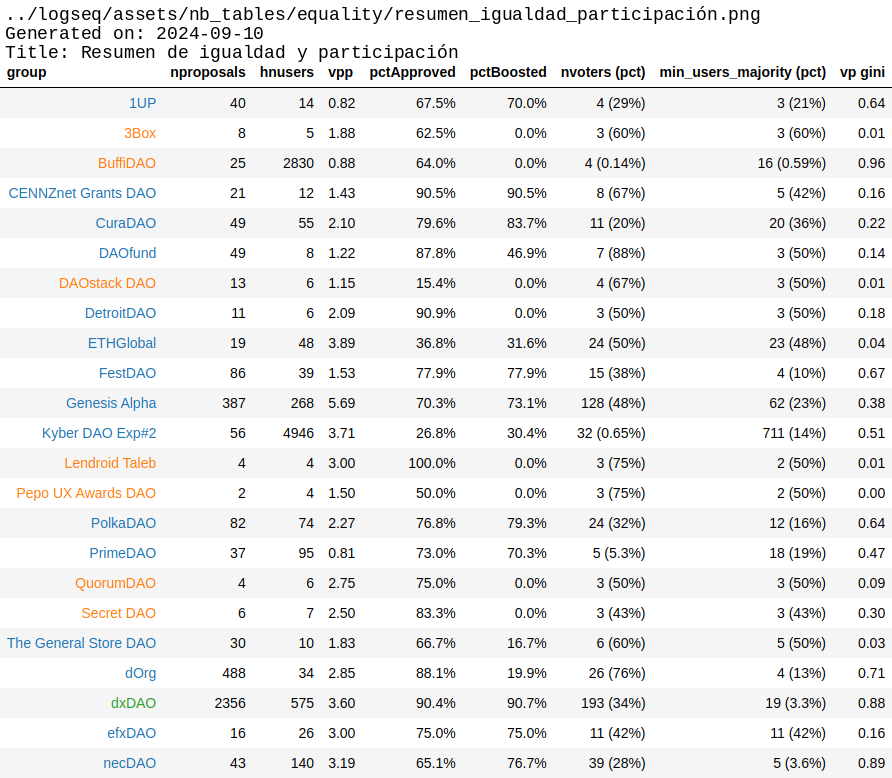

In [ ]:
COLUMNS = ['group', 'nproposals', 'hnusers', 'vpp', 'pctApproved', 'pctBoosted', 'nvoters (pct)', 'min_users_majority (pct)', 'vp gini']
INT_COLS = ['hnusers']
FLOAT_COLS = ['vpp', 'vp gini']
PCT_COLS = ['pctApproved', 'pctBoosted', 'precision']
HIDDEN_COLS = ['network', 'min_users_majority_pct']
COLUMNS_RENAME = {
    'name': 'Nombre',
    'cntActivity': 'Actividades',
    'hnusers': 'Número de usuarios',
    'min_users_majority (pct)': 'Usuarios necesarios para la may. absoluta (pct)',
}

dfg = utils.get_df('dfg')
dfh2 = dfh.groupby(['group', 'address']).sum()
dfhg = dfh2.groupby('group')

def _peoplePctGroup(s: pd.Series, pct = 0.5) -> pd.Series:
    return _peoplePct(s, pct)

# CUIDADO: No podemos usar _peoplePct pues habrá direcciones repetidas en los grupos de más de una DAO
dfg['min_users_majority'] = dfhg['balance'].apply(_peoplePctGroup)
dfg['min_users_majority_pct'] = dfg['min_users_majority'] / dfg['hnusers']
dfg['min_users_90'] = dfhg['balance'].apply(_peoplePctGroup, 0.90)
dfg['min_users_90_pct'] = dfg['min_users_90'] / dfg['hnusers']
dfg['vp gini'] = dfhg['balance'].agg(lambda x: ineqpy.inequality.gini(x.to_numpy()))
dfg['vp lac'] = dfhg['balance'].agg(lambda x: utils.functions.lac(x.to_numpy()))

dfgeq = dfg
%pickledf dfgeq

_table = dfg.reset_index()
_table = _table.sort_values('nproposals', ascending=False) #.head(20)
_table['min_users_majority_pct'] = _table['min_users_majority']/_table['nusers']*100
_table = utils.tables.add_pct_col(_table, 'min_users_majority', 'nusers')
_table = utils.tables.add_pct_col(_table, 'nvoters', 'hnusers')
_table[PCT_COLS] = _table[PCT_COLS]*100
_table = _table[COLUMNS + HIDDEN_COLS] # .rename(columns=COLUMNS_RENAME) # .set_index('Nombre')
_table = _table.sort_values('group')

s = _table.style.apply(utils.tables.nameColorByNetwork, namecol='group', axis=None) \
    .hide(HIDDEN_COLS, 'columns') \
    .format('{:.2f}'.format, subset=FLOAT_COLS) \
    .format('{:.0f}'.format, subset=INT_COLS) \
    .format('{:.1f}%'.format, subset=list(set(PCT_COLS).intersection(COLUMNS))) \
    .hide(axis='index')

print(_table['vp gini'].describe())

utils.tables.save_table_image(s, 'equality/resumen_igualdad_participación.png', title="Resumen de igualdad y participación", debug=True)

## Scatter plot nproposals vs. mpm

In [ ]:
_plot = _table
# _plot = _plot[_plot['group'] != 'Kyber DAO Exp #2']
_plot['log_hnusers'] = np.log(_plot['hnusers'])
px.scatter(_plot, y='nproposals', x='min_users_majority_pct', color='network', hover_data=['group', 'nproposals'], log_y=True)

In [ ]:
_table['mum_group'] = np.where(_table['min_users_majority_pct'] > 30, 'A', 'B')
_table.drop(columns=['log_hnusers']).groupby('mum_group').describe().transpose()

mum_group                              A            B
nproposals             count   13.000000    10.000000
                       mean    17.846154   360.000000
                       std     15.931343   719.980555
                       min      2.000000    25.000000
                       25%      6.000000    40.750000
                       50%     13.000000    69.000000
                       75%     21.000000   311.750000
                       max     49.000000  2356.000000
hnusers                count   13.000000    10.000000
                       mean    15.153846   901.500000
                       std     17.179669  1659.458295
                       min      4.000000    14.000000
                       25%      6.000000    47.750000
                       50%      7.000000   117.500000
                       75%     12.000000   498.250000
                       max     55.000000  4946.000000
vpp                    count   13.000000    10.000000
                       mean     2.180994     2.536113
                       std      0.813053     1.588958
                       min      1.153846     0.810811
                       25%      1.500000     1.043721
                       50%      2.090909     2.559351
                       75%      2.750000     3.495684
                       max      3.894737     5.692506
pctApproved            count   13.000000    10.000000
                       mean    70.266072    69.991767
                       std     24.048937    17.626565
                       min     15.384615    26.785714
                       25%     62.500000    65.712209
                       50%     75.000000    71.628605
                       75%     87.755102    77.637550
                       max    100.000000    90.407470
pctBoosted             count   13.000000    10.000000
                       mean    26.487235    58.829756
                       std     35.555110    30.496478
                       min      0.000000     0.000000
                       25%      0.000000    40.267857
                       50%      0.000000    71.698443
                       75%     46.938776    77.616279
                       max     90.476190    90.747029
vp gini                count   13.000000    10.000000
                       mean     0.103916     0.675017
                       std      0.097283     0.191404
                       min      0.002519     0.379710
                       25%      0.012351     0.540977
                       50%      0.094505     0.658684
                       75%      0.158388     0.839136
                       max      0.303777     0.957258
min_users_majority_pct count   13.000000    10.000000
                       mean    47.777831    12.556095
                       std      5.814728     7.950118
                       min     36.363636     0.586081
                       25%     42.857143     5.242674
                       50%     50.000000    13.854293
                       75%     50.000000    18.320115
                       max     60.000000    23.308271

## Tabla resumen resumen igualdad por grupo

In [ ]:
dfg.describe(percentiles=[.25,.50,.75,.85,.90,.95]).transpose()

count        mean          std       min        25%  \
daocnt                   23.0    1.130435     0.457697  1.000000   1.000000   
diff                     23.0   13.217391    12.202669  1.000000   3.500000   
nusers                   23.0  395.695652  1143.295573  4.000000   6.000000   
hnusers                  23.0  400.521739  1152.628611  4.000000   6.500000   
nproposals               23.0  166.608696   492.216207  2.000000  12.000000   
nvotes                   23.0  577.608696  1798.382069  3.000000  18.500000   
nvoters                  23.0   24.304348    45.308473  3.000000   3.500000   
nvoters_pct              23.0    0.450943     0.244564  0.001413   0.305019   
nproposers               23.0   22.608696    44.971445  0.000000   2.000000   
pctApproved              23.0    0.701468     0.210377  0.153846   0.645581   
pctBoosted               23.0    0.405492     0.365891  0.000000   0.000000   
vpp                      23.0    2.335394     1.194087  0.810811   1.464286   
spp                      23.0    0.898247     0.851265  0.000000   0.040000   
TP                       23.0  121.739130   437.305928  0.000000   0.000000   
TN                       23.0   22.913043    44.663299  0.000000   2.500000   
FP                       23.0    2.608696     6.080813  0.000000   0.000000   
FN                       23.0   19.347826    69.604473  0.000000   0.000000   
precision                23.0    0.665946     0.352019  0.000000   0.367500   
precision_boosted        15.0    0.935018     0.068782  0.800000   0.875959   
precision_nonboosted     23.0    0.646336     0.384698  0.000000   0.305000   
min_users_majority       23.0   40.869565   146.669171  2.000000   3.000000   
min_users_majority_pct   23.0    0.318337     0.187932  0.005654   0.152957   
min_users_90             23.0  186.826087   731.363649  4.000000   6.000000   
min_users_90_pct         23.0    0.688359     0.299497  0.053710   0.457875   
vp gini                  23.0    0.352221     0.322404  0.002519   0.067966   
vp lac                   23.0  298.645780   832.619153  1.037431   3.400721   

                              50%         75%         85%          90%  \
daocnt                   1.000000    1.000000    1.000000     1.000000   
diff                    10.000000   21.000000   24.400000    26.600000   
nusers                  26.000000   84.000000  228.200000   511.600000   
hnusers                 26.000000   84.500000  229.600000   513.600000   
nproposals              30.000000   52.500000   84.800000   326.800000   
nvotes                  48.000000  134.500000  201.400000  1154.400000   
nvoters                  7.000000   24.000000   30.200000    37.600000   
nvoters_pct              0.477612    0.633333    0.725000     0.750000   
nproposers               9.000000   15.500000   24.900000    33.400000   
pctApproved              0.750000    0.855442    0.897197     0.904624   
pctBoosted               0.315789    0.758721    0.788599     0.827924   
vpp                      2.102041    3.000000    3.475041     3.691208   
spp                      0.837838    1.376246    1.668750     1.816028   
TP                      15.000000   33.500000   65.800000    87.800000   
TN                       9.000000   14.500000   33.000000    51.000000   
FP                       0.000000    2.000000    3.700000     4.800000   
FN                       2.000000    7.500000   16.000000    19.200000   
precision                0.846154    0.973986    0.978421     0.995925   
precision_boosted        0.961131    0.993452    1.000000     1.000000   
precision_nonboosted     0.846154    1.000000    1.000000     1.000000   
min_users_majority       5.000000   17.000000   19.700000    22.400000   
min_users_majority_pct   0.375000    0.500000    0.500000     0.500000   
min_users_90            12.000000   44.000000   80.200000   138.600000   
min_users_90_pct         0.750000    0.908333    1.000000     1.000000   
vp gini                  0.218477    0.6

In [ ]:
dfg.sort_values('min_users_majority')

daocnt       firstActivity        lastProposal  diff  \
group                                                                         
Pepo UX Awards DAO          1 2020-02-12 03:49:50 2020-02-16 14:26:05   1.0   
Lendroid Taleb              1 2020-02-10 23:23:25 2020-02-10 23:33:40   1.0   
1UP                         1 2020-03-23 21:50:30 2020-10-02 19:22:26   7.0   
3Box                        1 2020-02-10 20:35:50 2020-06-06 19:15:45   4.0   
Secret DAO                  1 2020-02-11 05:23:55 2020-03-14 14:38:50   2.0   
DAOfund                     1 2019-07-31 19:57:13 2021-05-29 10:02:37  22.0   
DAOstack DAO                1 2020-02-12 21:49:20 2020-11-27 15:31:45  10.0   
DetroitDAO                  1 2019-10-15 10:31:52 2020-01-01 09:35:51   3.0   
QuorumDAO                   1 2020-02-11 05:42:35 2020-02-12 23:46:15   1.0   
dOrg                        3 2019-05-20 21:29:40 2021-07-26 18:16:59  27.0   
FestDAO                     1 2019-10-26 20:50:19 2021-05-27 07:12:25  20.0   
The General Store DAO       1 2019-07-30 00:46:40 2020-01-29 20:28:20   7.0   
necDAO                      1 2020-01-26 12:26:36 2023-02-20 14:05:47  37.0   
CENNZnet Grants DAO         1 2020-04-20 11:00:14 2020-08-19 14:58:02   4.0   
efxDAO                      1 2019-06-13 20:37:38 2020-02-03 15:47:54   8.0   
PolkaDAO                    1 2019-05-27 14:39:45 2020-09-24 15:07:51  16.0   
BuffiDAO                    1 2020-02-06 18:29:00 2020-12-23 10:03:06  11.0   
PrimeDAO                    1 2020-12-03 19:56:34 2022-05-28 10:54:49  18.0   
dxDAO                       2 2019-07-14 12:08:13 2023-04-05 13:25:00  45.0   
CuraDAO                     1 2019-08-06 22:47:40 2021-08-18 06:44:29  25.0   
ETHGlobal                   1 2019-11-07 19:30:21 2019-12-07 00:40:40   1.0   
Genesis Alpha               1 2019-04-10 18:59:04 2021-02-16 06:36:36  23.0   
Kyber DAO Exp#2             1 2019-06-21 11:33:35 2020-04-30 15:33:06  11.0   

                       network  nusers  hnusers  nproposals  nvotes  nvoters  \
group                                                                          
Pepo UX Awards DAO        xdai       4        4           2       3        3   
Lendroid Taleb            xdai       4        4           4      12        3   
1UP                    mainnet      14       14          40      33        4   
3Box                      xdai       5        5           8      15        3   
Secret DAO                xdai       7        7           6      15        3   
DAOfund                mainnet       6        8          49      60        7   
DAOstack DAO              xdai       6        6          13      15        4   
DetroitDAO             mainnet       6        6          11      23        3   
QuorumDAO                 xdai       6        6           4      11        3   
dOrg                   mainnet      30       34         488    1391       26   
FestDAO                mainnet      39       39          86     132       15   
The General Store DAO  mainnet      10       10          30      55        6   
necDAO                 mainnet     140      140          43     137       39   
CENNZnet Grants DAO    mainnet      12       12          21      30        8   
efxDAO                 mainnet      26       26          16      48       11   
PolkaDAO               mainnet      73       74          82     186       24   
BuffiDAO                  xdai    2730     2830          25      22        4   
PrimeDAO               mainnet      95       95          37      30        5   
dxDAO                    mixed     573      575        2356    8479      193   
CuraDAO                mainnet      55       55          49     103       11   
ETHGlobal              mainnet      48       48          19      74       24   
Genesis Alpha          mainnet     266      268         387    2203      128   
Kyber DAO Exp#2        mainnet    4946     4946          56     208       32   

                       ...   FN  precision  pr

In [ ]:
dfg[dfg['min_users_majority'] > 12]

daocnt       firstActivity        lastProposal  diff  \
group                                                                   
BuffiDAO              1 2020-02-06 18:29:00 2020-12-23 10:03:06  11.0   
CuraDAO               1 2019-08-06 22:47:40 2021-08-18 06:44:29  25.0   
ETHGlobal             1 2019-11-07 19:30:21 2019-12-07 00:40:40   1.0   
Genesis Alpha         1 2019-04-10 18:59:04 2021-02-16 06:36:36  23.0   
Kyber DAO Exp#2       1 2019-06-21 11:33:35 2020-04-30 15:33:06  11.0   
PrimeDAO              1 2020-12-03 19:56:34 2022-05-28 10:54:49  18.0   
dxDAO                 2 2019-07-14 12:08:13 2023-04-05 13:25:00  45.0   

                 network  nusers  hnusers  nproposals  nvotes  nvoters  ...  \
group                                                                   ...   
BuffiDAO            xdai    2730     2830          25      22        4  ...   
CuraDAO          mainnet      55       55          49     103       11  ...   
ETHGlobal        mainnet      48       48          19      74       24  ...   
Genesis Alpha    mainnet     266      268         387    2203      128  ...   
Kyber DAO Exp#2  mainnet    4946     4946          56     208       32  ...   
PrimeDAO         mainnet      95       95          37      30        5  ...   
dxDAO              mixed     573      575        2356    8479      193  ...   

                 FN  precision  precision_boosted  precision_nonboosted  \
group                                                                     
BuffiDAO         16   0.360000                NaN              0.360000   
CuraDAO           0   0.959184           0.951220              1.000000   
ETHGlobal         2   0.842105           0.833333              0.846154   
Genesis Alpha     0   0.971576           0.961131              1.000000   
Kyber DAO Exp#2   0   0.964286           0.882353              1.000000   
PrimeDAO          1   0.972973           1.000000              0.909091   
dxDAO            20   0.979626           0.986904              0.908257   

                 min_users_majority  min_users_majority_pct  min_users_90  \
group                                                                       
BuffiDAO                         16                0.005654           152   
CuraDAO                          20                0.363636            45   
ETHGlobal                        23                0.479167            43   
Genesis Alpha                    62                0.231343           199   
Kyber DAO Exp#2                 711                0.143753          3534   
PrimeDAO                         18                0.189474            69   
dxDAO                            19                0.033043            85   

                 min_users_90_pct   vp gini       vp lac  
group                                                     
BuffiDAO                 0.053710  0.957258  2503.019806  
CuraDAO                  0.818182  0.218477    44.655227  
ETHGlobal                0.895833  0.041427    44.872755  
Genesis Alpha            0.742537  0.379710   187.431202  
Kyber DAO Exp#2          0.714517  0.507845  3277.232666  
PrimeDAO                 0.726316  0.468574    60.269832  
dxDAO                    0.147826  0.883247   486.093631  

[7 rows x 29 columns]

# Tabla resumen igualdad por DAO

In [ ]:
dfd.columns

Index(['id', 'name', 'register', 'nativeToken', 'nativeReputation', 'nusers',
       'hnusers', 'firstUser', 'firstActivity', 'lastActivity', 'lastVote',
       'cntActivity', 'nvotes', 'nstakes', 'nproposals',
       'monthsSinceFirstUser', 'monthSinceFirstActivity',
       'monthsSinceLastActivity', 'monthsWithActivity', 'monthsWithProposals',
       'pctActive', 'pctApproved', 'pctBoosted', 'pctStaked', 'vpp', 'spp',
       'TP', 'TN', 'FP', 'FN', 'precision', 'precision_boosted',
       'precision_nonboosted', 'nvoters', 'nproposers', 'shortid', 'group',
       'originalName', 'min_users_majority', 'min_users_majority_pct',
       'min_users_majority_address', 'vp gini', 'vp lac'],
      dtype='object')

count    26.000000
mean      0.387625
std       0.329144
min       0.002519
25%       0.066784
50%       0.327396
75%       0.643520
max       0.957258
Name: vp gini, dtype: float64
saving to ../logseq/assets/nb_tables/equality/resumen_igualdad_participación.png
/usr/bin/chromium
Use ![Resumen de igualdad y participación](assets/nb_tables/equality/resumen_igualdad_participación.png) to embed it in logseq


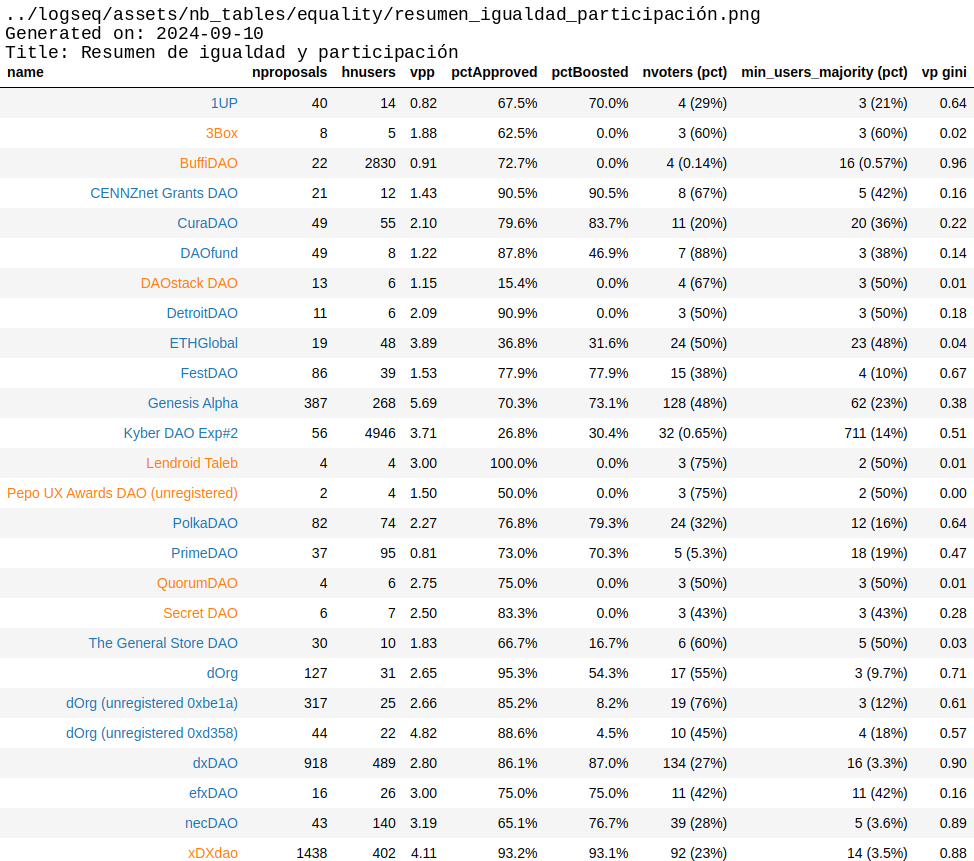

In [ ]:
COLUMNS = ['name', 'nproposals', 'hnusers', 'vpp', 'pctApproved', 'pctBoosted', 'nvoters (pct)', 'min_users_majority (pct)', 'vp gini']
INT_COLS = ['hnusers']
FLOAT_COLS = ['vpp', 'vp gini']
PCT_COLS = ['pctApproved', 'pctBoosted', 'precision']
HIDDEN_COLS = ['network', 'min_users_majority_pct']
COLUMNS_RENAME = {
    'name': 'Nombre',
    'cntActivity': 'Actividades',
    'hnusers': 'Número de usuarios',
    'min_users_majority (pct)': 'Usuarios necesarios para la may. absoluta (pct)',
}

dfhgb = dfh.groupby(['network', 'dao'])
dfd['vp gini'] = dfhgb['balance'].agg(lambda x: ineqpy.inequality.gini(x.to_numpy()))
dfd['vp lac'] = dfhgb['balance'].agg(lambda x: utils.functions.lac(x.to_numpy()))

_table = dfd.reset_index()
_table = _table.sort_values('nproposals', ascending=False)# .head(20)
_table['min_users_majority_pct'] = _table['min_users_majority']/_table['hnusers']*100
_table = utils.tables.add_pct_col(_table, 'min_users_majority', 'hnusers')
_table = utils.tables.add_pct_col(_table, 'nvoters', 'hnusers')
_table[PCT_COLS] = _table[PCT_COLS]*100
_table = _table[COLUMNS + HIDDEN_COLS] # .rename(columns=COLUMNS_RENAME) # .set_index('Nombre')
_table = _table.sort_values('name')

s = _table.style.apply(utils.tables.nameColorByNetwork, axis=None) \
    .hide(HIDDEN_COLS, 'columns') \
    .format('{:.2f}'.format, subset=FLOAT_COLS) \
    .format('{:.0f}'.format, subset=INT_COLS) \
    .format('{:.1f}%'.format, subset=list(set(PCT_COLS).intersection(COLUMNS))) \
    .hide(axis='index')

print(_table['vp gini'].describe())

utils.tables.save_table_image(s, 'equality/resumen_igualdad_participación.png', title="Resumen de igualdad y participación", debug=True)

## Scatter plot nproposals vs. mpm

In [ ]:
_plot = _table.copy()
# _plot = _plot[_plot['group'] != 'Kyber DAO Exp #2']
_plot['log_hnusers'] = np.log(_plot['hnusers'])
px.scatter(_plot, y='nproposals', x='min_users_majority_pct', color='network', hover_data=['name'], log_y=True)

In [ ]:
_table['mum_group'] = np.where(_table['min_users_majority_pct'] > 30, 'A', 'B')
_table.groupby('mum_group').describe().transpose()

mum_group                              A            B
nproposals             count   13.000000    13.000000
                       mean    17.846154   276.692308
                       std     15.931343   428.776046
                       min      2.000000    22.000000
                       25%      6.000000    43.000000
                       50%     13.000000    82.000000
                       75%     21.000000   317.000000
                       max     49.000000  1438.000000
hnusers                count   13.000000    13.000000
                       mean    15.153846   721.153846
                       std     17.179669  1478.215019
                       min      4.000000    14.000000
                       25%      6.000000    31.000000
                       50%      7.000000    95.000000
                       75%     12.000000   402.000000
                       max     55.000000  4946.000000
vpp                    count   13.000000    13.000000
                       mean     2.180994     2.767019
                       std      0.813053     1.540877
                       min      1.153846     0.810811
                       25%      1.500000     1.534884
                       50%      2.090909     2.659306
                       75%      2.750000     3.714286
                       max      3.894737     5.692506
pctApproved            count   13.000000    13.000000
                       mean    70.266072    75.265369
                       std     24.048937    17.498672
                       min     15.384615    26.785714
                       25%     62.500000    70.284238
                       50%     75.000000    76.829268
                       75%     87.755102    86.056645
                       max    100.000000    95.275591
pctBoosted             count   13.000000    13.000000
                       mean    26.487235    55.761847
                       std     35.555110    33.182952
                       min      0.000000     0.000000
                       25%      0.000000    30.357143
                       50%      0.000000    70.270270
                       75%     46.938776    77.906977
                       max     90.476190    93.115438
vp gini                count   13.000000    13.000000
                       mean     0.096277     0.678974
                       std      0.094993     0.180998
                       min      0.002519     0.379710
                       25%      0.012351     0.571238
                       50%      0.041427     0.644569
                       75%      0.158388     0.880324
                       max      0.275083     0.957258
min_users_majority_pct count   13.000000    13.000000
                       mean    46.816293    11.931443
                       std      6.418783     7.536908
                       min     36.363636     0.565371
                       25%     42.307692     3.571429
                       50%     50.000000    12.000000
                       75%     50.000000    18.181818
                       max     60.000000    23.134328

## Heatmap de correlaciones

nproposals              monthsWithActivity        0.854083
monthsWithActivity      nproposals                0.854083
precision_nonboosted    precision                 0.853279
precision               precision_nonboosted      0.853279
nproposals              nvoters                   0.849856
nvoters                 nproposals                0.849856
min_users_majority_pct  hnusers                  -0.845429
hnusers                 min_users_majority_pct   -0.845429
precision               pctBoosted                0.833819
pctBoosted              precision                 0.833819
nvoters                 hnusers                   0.804288
hnusers                 nvoters                   0.804288
nproposals              TN                        0.802539
TN                      nproposals                0.802539
                        nvoters                   0.800181
nvoters                 TN                        0.800181
monthsWithActivity      nvoters                   0.7995

Text(0.5, 1.0, 'Correlación pearson')

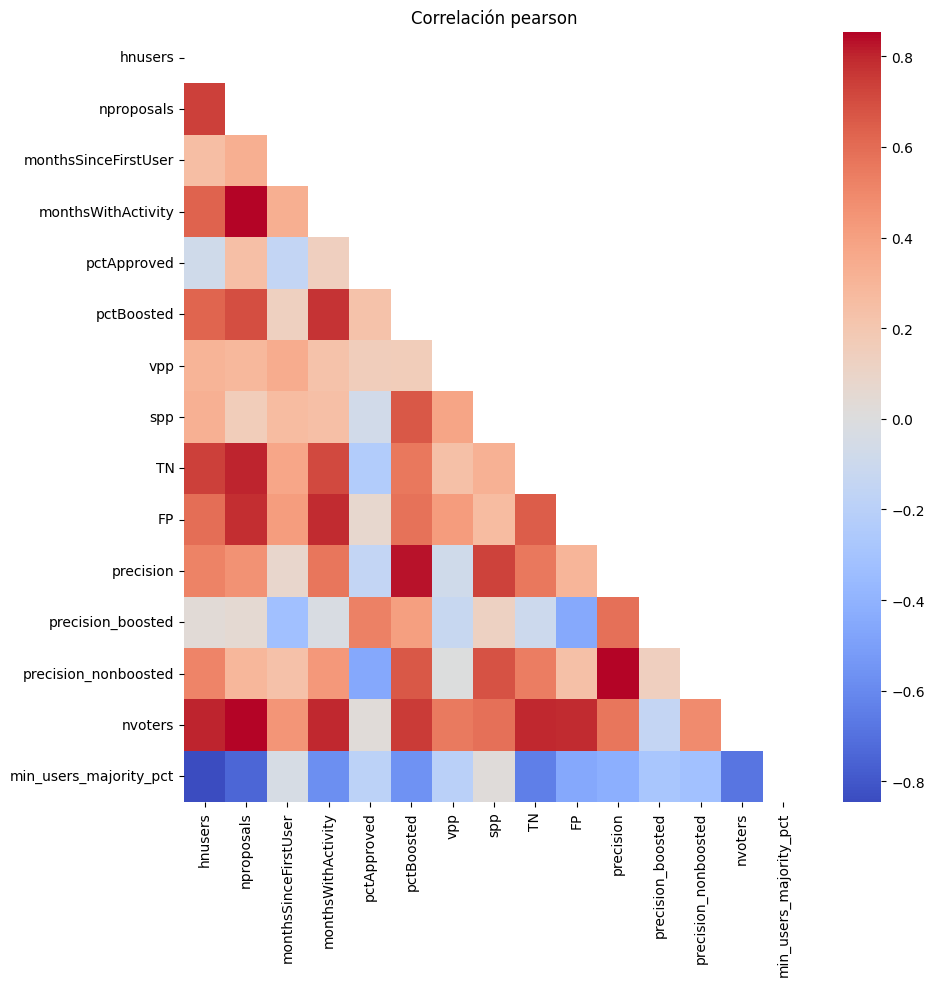

In [ ]:
DROP_COLS = [
    'nusers', 'min_users_majority', 'nproposers', # ~ 'hnusers'
    'nstakes', 'nvotes', 'cntActivity', # ~ 'nproposals'
    'monthSinceFirstActivity', # ~ monthsSinceFirstUser
    'monthsWithProposals', # ~ pctActive
    'vp gini', 'vp lac', # ~ min_users_majority_pct
    'pctStaked', # ~ pctBoosted
    'shortid',
    'FN', 'TP', # ~precision_nonboosted
    'monthsSinceLastActivity', 'pctActive',
]

fig, ax = plt.subplots(figsize=(10,10))
corr = dfd.drop(columns=DROP_COLS).corr(numeric_only=True, method='spearman')
msk = np.triu(np.ones_like(corr, dtype=bool))
cunstack = corr.unstack().sort_values(key=abs, ascending=False)
print(cunstack[cunstack != 1].head(30))
sns.heatmap(corr, mask=msk, ax=ax, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.gca().set_title('Correlación pearson')

Text(0.5, 1.0, 'Correlación spearman')

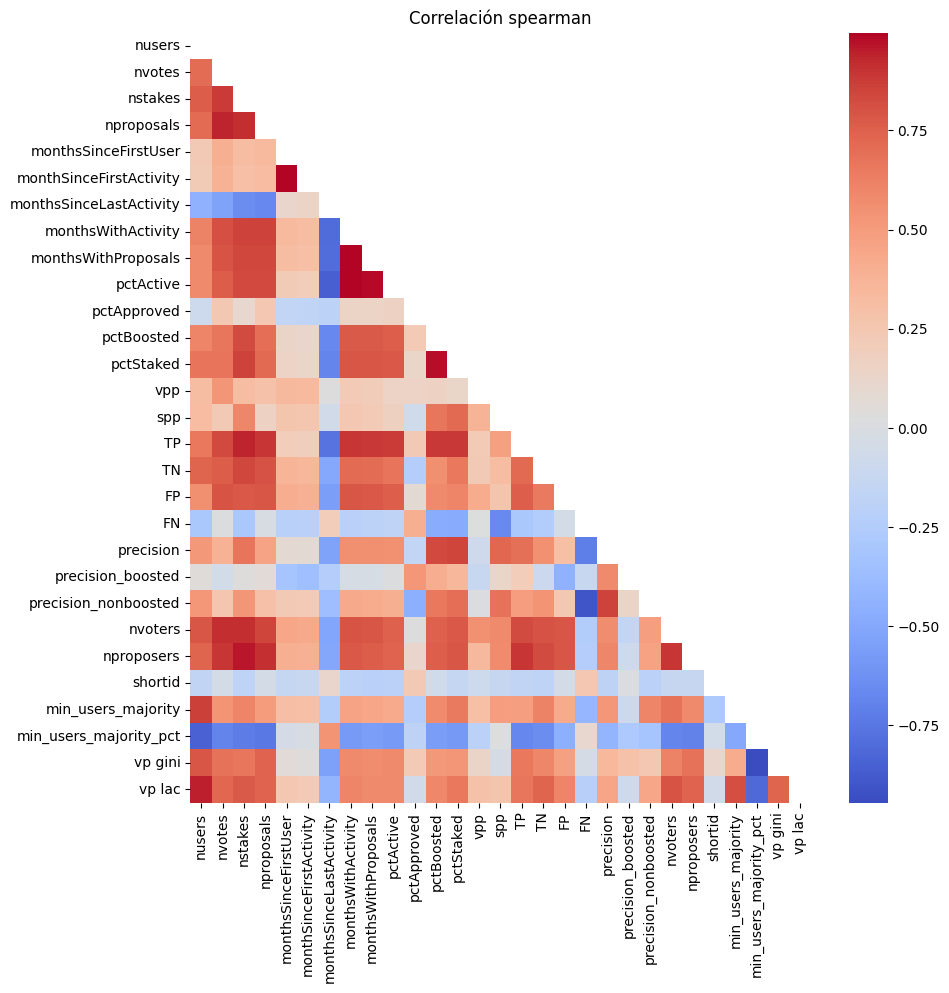

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
corr = dfd.drop(columns=['hnusers', 'cntActivity']).corr(numeric_only=True, method='spearman')
msk = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=msk, ax=ax, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.gca().set_title('Correlación spearman')

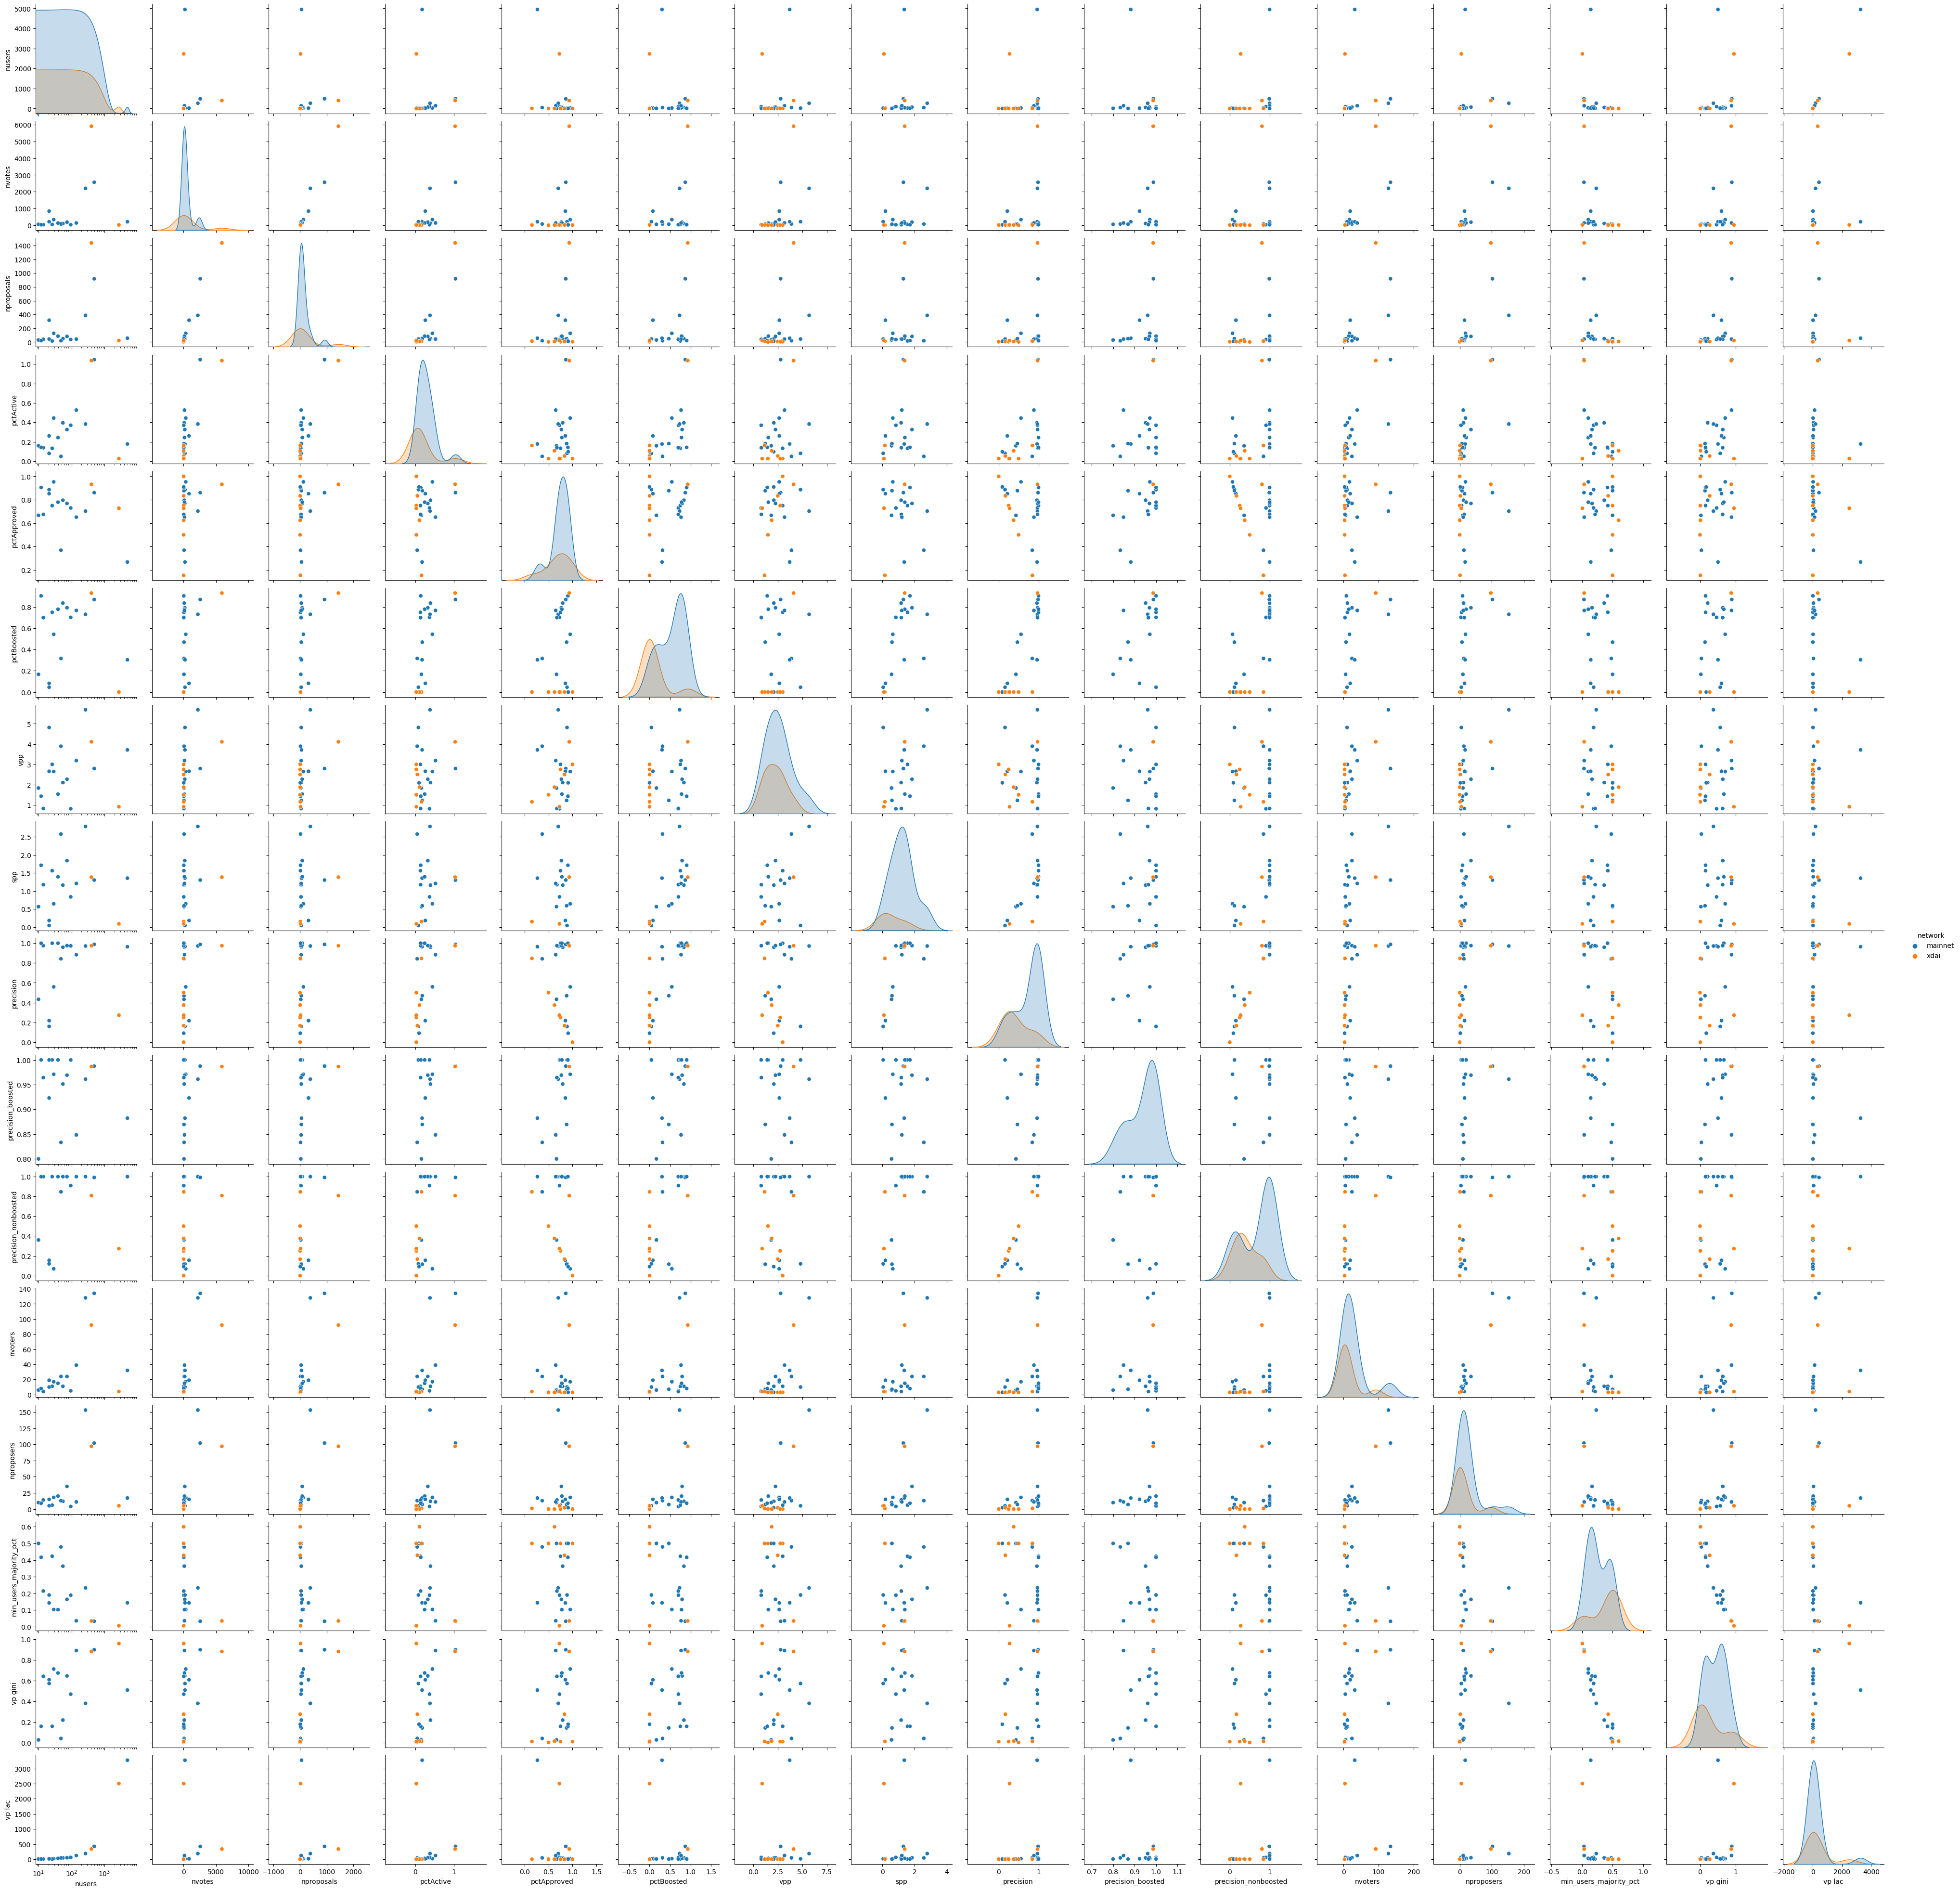

In [ ]:
COLS = ['nusers', 'nvotes', 'nproposals', 'pctActive', 'pctApproved', 'pctBoosted', 'vpp', 'spp', 'precision', 'precision_boosted', 'precision_nonboosted', 'nvoters', 'nproposers', 'min_users_majority_pct', 'vp gini', 'vp lac']
LOG_COLS = ['nusers']

pp = sns.pairplot(dfd[COLS].reset_index(), hue='network')

for ax in pp.axes.flat:
    if ax.get_xlabel() in LOG_COLS:
        ax.set(xscale="log")

## Scatter nusers vs nproposals

In [ ]:
print(scipy.stats.spearmanr(dfd['hnusers'], dfd['nproposals']))

fig = px.scatter(dfd.reset_index(),
           x='hnusers',
           y='nproposals',
           log_x=True,
           log_y=True,
           color='network',
           hover_data=['name'],
           trendline="ols",
           trendline_options={'log_x': True, 'log_y': True}, 
           trendline_scope="overall"
          )
utils.plot.save_fig(fig, 'equality/scatter_nusers_nproposals.png')

SignificanceResult(statistic=0.7367791489700852, pvalue=1.7685090142049167e-05)
saving to ../logseq/assets/nb_figures/equality/scatter_nusers_nproposals.png
Use ![None](../assets/nb_figures/equality/scatter_nusers_nproposals.png) to embed it in logseq


In [ ]:
px.scatter(dfd.reset_index(), 
           x='hnusers', 
           y='vp gini', 
           log_x=True, 
           log_y=False, 
           color='network', 
           hover_data=['name'],
           trendline="ols",
           trendline_options={'log_x': True,},
           trendline_scope="overall",
          )

In [ ]:
px.scatter(dfd.reset_index(), x='hnusers', y='precision', log_x=True, log_y=False, color='network', hover_data=['name'])

## Scatter hnusers vs pct staked proposals

Al igual que en el paper de Youssef, primero sacamos el spearmanr 

In [ ]:
X = ['hnusers', 'nproposals']
Y = ['pctStaked', 'pctBoosted']

def _print_corr(df, save_path=None):
    for n in ['mainnet', 'xdai']:
        dfd_n = df.loc[n].reset_index()

        c = dfd_n[X+Y].corr('spearman').loc[(X,Y)]
        
        if save_path:
            utils.tables.save_table_image(c, save_path + f'_spearman_{n}.png')
        
        print(n)
        print(c)
        print()
        
_print_corr(dfd)

mainnet
            pctStaked  pctBoosted
hnusers      0.512900    0.420021
nproposals   0.277749    0.225090

xdai
            pctStaked  pctBoosted
hnusers      0.634981    0.417392
nproposals   0.850673    0.580818



Ahora quitando KyberDAO y BuffiDAO 

In [ ]:
REMOVE_NAMES = ['Kyber DAO Exp#2', 'BuffiDAO']

msk = dfd['name'].isin(REMOVE_NAMES)
assert msk.sum() == len(REMOVE_NAMES)

print("Sin", ", ".join(REMOVE_NAMES))
_print_corr(dfd[~msk], 'equality/youssef_nooutliers')

Sin Kyber DAO Exp#2, BuffiDAO
saving to ../logseq/assets/nb_tables/equality/youssef_nooutliers_spearman_mainnet.png
/usr/bin/chromium
Use ![None](assets/nb_tables/equality/youssef_nooutliers_spearman_mainnet.png) to embed it in logseq
mainnet
            pctStaked  pctBoosted
hnusers      0.661765    0.551471
nproposals   0.316370    0.258737

saving to ../logseq/assets/nb_tables/equality/youssef_nooutliers_spearman_xdai.png
/usr/bin/chromium
Use ![None](assets/nb_tables/equality/youssef_nooutliers_spearman_xdai.png) to embed it in logseq
xdai
            pctStaked  pctBoosted
hnusers      0.612372    0.623610
nproposals   0.809040    0.617914



In [ ]:
fig = px.scatter(
    dfd.loc[('mainnet')].reset_index(), 
    x='hnusers',
    y='pctStaked', 
    log_x=True, 
    log_y=False, 
    # color='network', 
    hover_data=['name', 'nproposals'],
    template='custom',
    # trendline="ols",
    # trendline_options={'log_x': True,},
    # trendline_scope="overall",
)

utils.plot.save_fig(fig, 'equality/pctStaked_vs_nusers_mainnet.png', width=600, height=400)

saving to ../logseq/assets/nb_figures/equality/pctStaked_vs_nusers_mainnet.png
Use ![None](../assets/nb_figures/equality/pctStaked_vs_nusers_mainnet.png) to embed it in logseq


In [ ]:
print(scipy.stats.spearmanr(dfd['hnusers'], dfd['pctBoosted']))

px.scatter(
    dfd.reset_index(), 
    x='hnusers',
    y='pctBoosted',
    log_x=True, 
    log_y=False, 
    color='network', 
    hover_data=['name'],
    trendline="ols",
    trendline_options={'log_x': True,},
    trendline_scope="overall",
)

SignificanceResult(statistic=0.622867106006993, pvalue=0.000677401972934812)
